In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import coint
import seaborn as sns
import matplotlib.pyplot as plt

# Lithium

In [2]:
# Load data source #1 - Lithium prices in USD per kilogram from DailyMetal
df1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Lithium_prices_2017-01-01_to_2025-10-31_merged.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Price'] = df1['Price'].astype(float)
df1 = df1.drop(columns=['Unit'])
df1 = df1.sort_values(by='Date')
df1.head()

,Date,Price
0,2017-05-10,20.92
1,2017-05-10,20.92
2,2017-05-11,20.92
3,2017-05-11,20.92
4,2017-05-12,20.92


In [3]:
# Load data source #2 - South America LOB
df2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/lithium_SouthAmerica_LOB_2017m.csv', sep=';')
df2.head()
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Price'] = df2['Price'].astype(float)
df2['Price'] = df2['Price']
df2 = df2.sort_values(by='Date')
df2.head()

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/2796864249.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


,Date,Price
0,2016-12-31,10000.0
1,2017-01-31,10000.0
2,2017-02-28,10250.0
3,2017-03-31,10250.0
4,2017-04-30,10500.0


In [4]:
# Load data source #3 - COMEX Lithium Hydroxide future
df3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX Lithium Hydroxide CIF CJK (Fastmarkets) Electronic Commodity Future Continuation 1.csv', sep=';')
df3 = df3.rename(columns={'Exchange Date': 'Date'})
df3 = df3.rename(columns={'Close' : 'Price'})
# Map non-English month abbreviations to English
month_map = {
	'Jan': 'Jan', 'Feb': 'Feb', 'Mär': 'Mar', 'Mar': 'Mar', 'Apr': 'Apr', 'Mai': 'May', 'Jun': 'Jun',
	'Jul': 'Jul', 'Aug': 'Aug', 'Sep': 'Sep', 'Okt': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec', 'Oct': 'Oct', 'Dec': 'Dec'
}
import re

def replace_month(date_str):
	# Replace German month abbreviations with English
	for de_month, en_month in month_map.items():
		date_str = re.sub(rf'-{de_month}-', f'-{en_month}-', date_str)
	return date_str

df3['Date'] = df3['Date'].apply(replace_month)
# Use format='mixed' to handle inconsistent date formats
df3['Date'] = pd.to_datetime(df3['Date'], format='mixed', dayfirst=True)
df3 = df3.iloc[:, :2] # Keep only the first 2 columns
df3 = df3.sort_values(by='Date') # Sort by date
df3.head()

,Date,Price
0,2021-05-03,14
1,2021-05-04,14
2,2021-05-05,14
3,2021-05-06,14
4,2021-05-07,14


In [5]:
# Load Lithium data source #4 - Lithium Americas Corp
df4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Lithium Americas Corp.csv', sep=';')
df4 = df4.rename(columns={'Exchange Date': 'Date'})
df4 = df4.rename(columns={'Close' : 'Price'})

import re

def replace_month(date_str):
	# Replace German month abbreviations with English using month_map
	for de_month, en_month in month_map.items():
		date_str = re.sub(rf'-{de_month}-', f'-{en_month}-', date_str)
	return date_str

df4['Date'] = df4['Date'].apply(replace_month)
df4['Date'] = pd.to_datetime(df4['Date'], format='mixed', dayfirst=True)
df4 = df4.iloc[:, :2] # Keep only the first 2 columns
df4['Price'] = df4['Price'].str.replace(',', '.').astype(float)
df4 = df4.sort_values(by='Date')
df4.head()

,Date,Price
404,2023-10-02,10.13
403,2023-10-03,9.67
402,2023-10-04,11.72
401,2023-10-05,10.90
400,2023-10-06,11.49


In [6]:
# Load Lithium data source #5 - East Asia Lithium Carbonate 99.5% Swap
df5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/East Asia Lithium Carbonate 99.5% CIF CJK Financial Swap USD_MT (Fastmarkets) Singapore Exchange SIMEX.csv', sep=';')
df5 = df5.iloc[:, :2]
df5['Date'] = pd.to_datetime(df5['Date'], format='%m/%d/%y')
df5['Close Price'] = df5['Close Price'].str.replace(',', '.').astype(float)
df5 = df5.rename(columns={'Close Price': 'Price'})
df5 = df5.sort_values(by='Date')
df5.head()

,Date,Price
493,2023-05-02,37.75
492,2023-05-03,36.44
491,2023-05-04,36.48
490,2023-05-05,36.48
489,2023-05-08,36.48


In [7]:
# Load Lithium data source #6 - East Asia Lithium Carbonate Battery Grade CIF
df6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/East Asia Lithium Carbonate China Korea Japan Battery Grade CIF USD_kg Future Singapore Exchange SIMEX.csv', sep=';')
df6 = df6.iloc[:, :2]
df6['Date'] = pd.to_datetime(df6['Date'], format='%m/%d/%y')
df6['Close Price'] = df6['Close Price'].str.replace(',', '.').astype(float)
df6 = df6.rename(columns={'Close Price': 'Price'})
df6 = df6.sort_values(by='Date')
df6.head()

,Date,Price
512,2023-04-03,43.70
511,2023-04-04,42.94
510,2023-04-05,42.92
509,2023-04-06,40.36
508,2023-04-10,38.67


In [8]:
# Load Lithium data source #7 - LME Lithium 3MO
df7 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/LME Lithium Hydroxide CIF (Fastmakrets MB) Future.csv', sep=';')
df7.head()
df7['Date'] = pd.to_datetime(df7['Date'], format='mixed')
df7 = df7.rename(columns={'Close Price': 'Price'})
df7['Price'] = df7['Price'].str.replace(',', '.').astype(float)
df7 = df7.sort_values(by='Date')
df7 = df7.iloc[:, :2]
df7.head()

,Date,Price
934,2021-07-19,15450.0
933,2021-07-20,15450.0
932,2021-07-21,15450.0
931,2021-07-22,15450.0
930,2021-07-23,15450.0


In [9]:
# Merge all
df_merged = pd.merge(df1, df2, on='Date', suffixes=('_Lithium', '_SouthAmericaLOB'))
df_merged = pd.merge(df_merged, df3[['Date', 'Price']], on='Date', how='inner')
df_merged = pd.merge(df_merged, df4[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Hydroxide', '_Lithium_Americas'))
df_merged = pd.merge(df_merged, df5[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Americas', '_EastAsia_Lithium_Carbonate'))
df_merged = pd.merge(df_merged, df6[['Date', 'Price']], on='Date', how='inner', suffixes=('_EastAsia_Lithium_Carbonate', '_EastAsia_Lithium_Carbonate_Battery_Grade'))
# Rename 'Price' in df7 to 'Price_LME_Lithium' before merging
df7_renamed = df7.rename(columns={'Price': 'Price_LME_Lithium'})
df_merged = pd.merge(df_merged, df7_renamed[['Date', 'Price_LME_Lithium']], on='Date', how='inner')

df_merged = df_merged.rename(columns={'Price_Lithium': 'Price_Lithium',
                                      'Price_SouthAmericaLOB': 'Price_SouthAmericaLOB',
                                      'Price_Lithium_Hydroxide': 'Price_Lithium_Hydroxide',
                                      'Price_Lithium_Americas': 'Price_Lithium_Americas',
                                      'Price_EastAsia_Lithium_Carbonate': 'Price_EastAsia_Lithium_Carbonate',
                                      'Price_EastAsia_Lithium_Carbonate_Battery_Grade': 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'})

# Convert all price columns to float
df_merged['Price_Lithium'] = df_merged['Price_Lithium'].astype(float)
df_merged['Price_SouthAmericaLOB'] = df_merged['Price_SouthAmericaLOB'].astype(float)
df_merged['Price_Lithium_Hydroxide'] = df_merged['Price_Lithium_Hydroxide'].astype(float)
df_merged['Price_Lithium_Americas'] = df_merged['Price_Lithium_Americas'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate'] = df_merged['Price_EastAsia_Lithium_Carbonate'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].astype(float)
df_merged['Price_LME_Lithium'] = df_merged['Price_LME_Lithium'].astype(float)

df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)
df_merged.head()

,Date,Price_Lithium,Price_SouthAmericaLOB,Price_Lithium_Hydroxide,Price_Lithium_Americas,Price_EastAsia_Lithium_Carbonate,Price_EastAsia_Lithium_Carbonate_Battery_Grade,Price_LME_Lithium
0,2023-10-04,22.814,32750.0,25.0,11.72,22.77,22.66,24500.00
1,2023-10-04,22.814,32750.0,25.0,11.72,22.77,22.66,24500.00
2,2023-10-18,23.857,28250.0,24.0,8.16,23.32,23.25,23886.36
3,2023-10-18,23.857,28250.0,24.0,8.16,23.32,23.25,23886.36
4,2023-11-01,22.339,28250.0,22.0,6.60,18.23,18.15,22000.00


In [10]:
print(f"First observation date: {df_merged['Date'].min()}, Last observation date: {df_merged['Date'].max()}")

First observation date: 2023-10-04 00:00:00, Last observation date: 2024-12-11 00:00:00


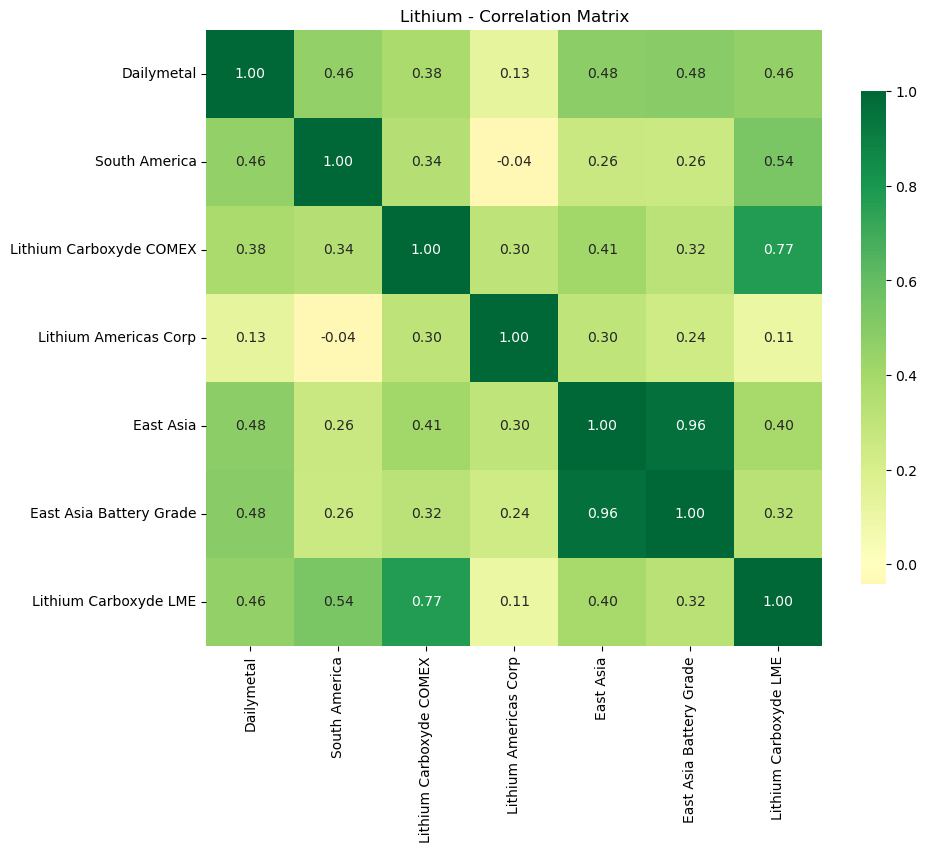

In [11]:
# Calculate the correlation matrix using the returns
df_merged['Dailymetal'] = df_merged['Price_Lithium'].pct_change()
df_merged['South America'] = df_merged['Price_SouthAmericaLOB'].pct_change()
df_merged['Lithium Carboxyde COMEX'] = df_merged['Price_Lithium_Hydroxide'].pct_change()
df_merged['Lithium Americas Corp'] = df_merged['Price_Lithium_Americas'].pct_change()
df_merged['East Asia'] = df_merged['Price_EastAsia_Lithium_Carbonate'].pct_change()
df_merged['East Asia Battery Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].pct_change()
df_merged['Lithium Carboxyde LME'] = df_merged['Price_LME_Lithium'].pct_change()
# Drop NaN values
df_merged = df_merged.dropna(subset=['Dailymetal', 'South America', 'Lithium Carboxyde COMEX', 'Lithium Americas Corp', 'East Asia', 'East Asia Battery Grade', 'Lithium Carboxyde LME'])
df_merged = df_merged.dropna()
# Calculate the correlation matrix using the correct return columns
correlation_matrix = df_merged[['Dailymetal', 'South America', 'Lithium Carboxyde COMEX', 'Lithium Americas Corp', 'East Asia', 'East Asia Battery Grade', 'Lithium Carboxyde LME']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Lithium - Correlation Matrix')
# plt.figtext(0.1, -0.15, "First observation date: 2023-10-04, Last observation date: 2024-12-11", ha='center', fontsize=7)
plt.show()


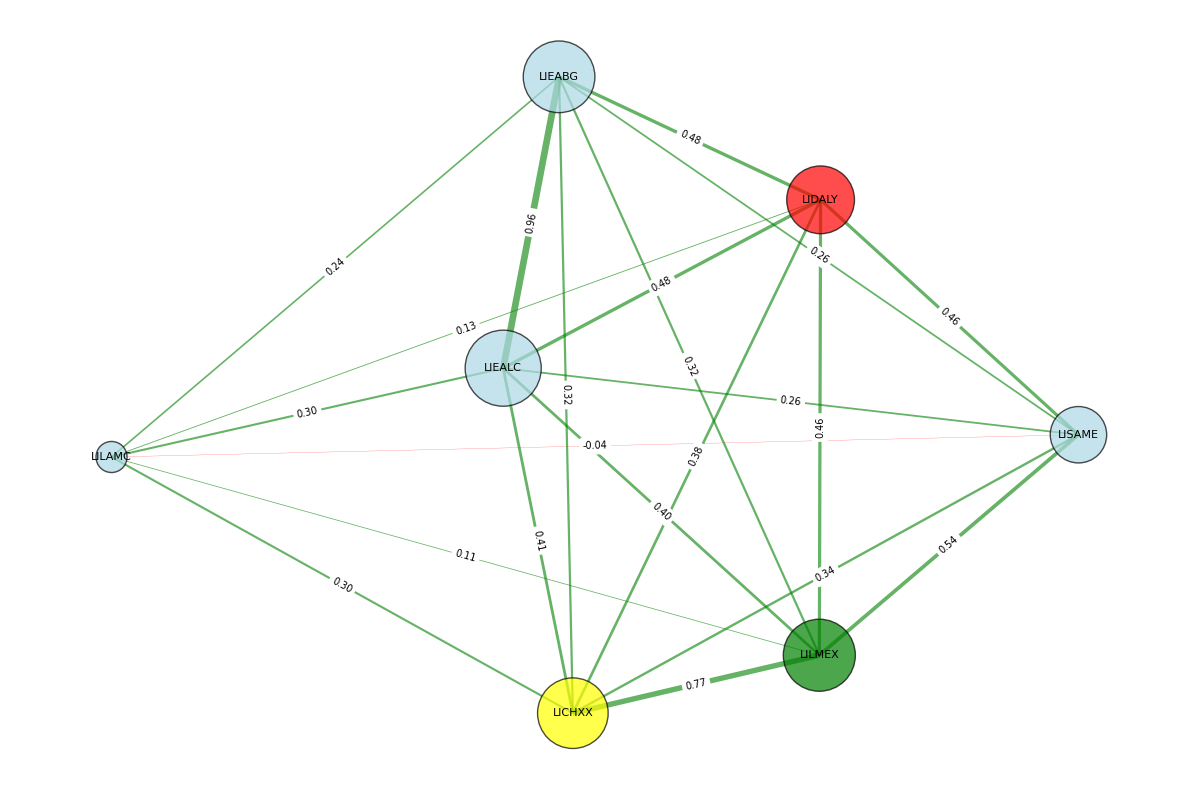


Node Centrality Values:
East Asia: 2.8084
Lithium Carboxyde LME: 2.5996
East Asia Battery Grade: 2.5796
Lithium Carboxyde COMEX: 2.5270
Dailymetal: 2.3904
South America: 1.8967
Lithium Americas Corp: 1.1207


In [12]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=42)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    'Dailymetal': 'LIDALY',
    'South America': 'LISAME',
    'Lithium Carboxyde COMEX': 'LICHXX',
    'Lithium Americas Corp': 'LILAMC',
    'East Asia': 'LIEALC',
    'East Asia Battery Grade': 'LIEABG',
    'Lithium Carboxyde LME': 'LILMEX'
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=8)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

# Create a legend for node colors
# from matplotlib.patches import Patch
# legend_elements = [
#     Patch(facecolor='red', label='Dailymetal'),
#     Patch(facecolor='green', label='LME'),
#     Patch(facecolor='yellow', label='COMEX'),
#     Patch(facecolor='lightblue', label='Other')
# ]
# plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))

# Add a note about node sizes
# plt.figtext(0.02, 0.02, 'Node size represents centrality (sum of absolute edge weights)', fontsize=10, style='italic')

# plt.title('Lithium - Correlation Network', pad=20)
plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/lithium_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")

In [13]:
# Print min and max date for all data sources
print(f"First observation date df1: {df1['Date'].min()}, Last observation date df1: {df1['Date'].max()}")
print(f"First observation date df2: {df2['Date'].min()}, Last observation date df2: {df2['Date'].max()}")
print(f"First observation date df3: {df3['Date'].min()}, Last observation date df3: {df3['Date'].max()}")
print(f"First observation date df4: {df4['Date'].min()}, Last observation date df4: {df4['Date'].max()}")
print(f"First observation date df5: {df5['Date'].min()}, Last observation date df5: {df5['Date'].max()}")
print(f"First observation date df6: {df6['Date'].min()}, Last observation date df6: {df6['Date'].max()}")
print(f"First observation date df7: {df7['Date'].min()}, Last observation date df7: {df7['Date'].max()}")

First observation date df1: 2017-05-10 00:00:00, Last observation date df1: 2025-10-31 00:00:00
First observation date df2: 2016-12-31 00:00:00, Last observation date df2: 2024-12-11 00:00:00
First observation date df3: 2021-05-03 00:00:00, Last observation date df3: 2025-10-31 00:00:00
First observation date df4: 2023-10-02 00:00:00, Last observation date df4: 2025-10-31 00:00:00
First observation date df5: 2023-05-02 00:00:00, Last observation date df5: 2025-03-28 00:00:00
First observation date df6: 2023-04-03 00:00:00, Last observation date df6: 2025-03-28 00:00:00
First observation date df7: 2021-07-19 00:00:00, Last observation date df7: 2025-03-28 00:00:00


In [14]:
dfmerged2 = pd.merge(df1, df2, on='Date', suffixes=('_Lithium', '_SouthAmericaLOB'))
dfmerged2 = pd.merge(dfmerged2, df7[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Hydroxide', '_LME_Nickel'))
dfmerged2 = pd.merge(dfmerged2, df3[['Date', 'Price']], on='Date', how='inner')

dfmerged2 = dfmerged2.rename(columns={'Price_x': 'Price_LME',
                                      'Price_y': 'Price_COMEX'})

dfmerged2.head()

,Date,Price_Lithium,Price_SouthAmericaLOB,Price_LME,Price_COMEX
0,2021-08-31,14.316,11000.0,16070.0,16
1,2021-08-31,14.316,11000.0,16070.0,16
2,2021-09-30,25.526,11500.0,20100.0,20
3,2021-09-30,25.526,11500.0,20100.0,20
4,2021-11-30,31.156,14000.0,29380.0,27


In [15]:
print(f"First observation date dfmerged2: {dfmerged2['Date'].min()}, Last observation date dfmerged2: {dfmerged2['Date'].max()}")

First observation date dfmerged2: 2021-08-31 00:00:00, Last observation date dfmerged2: 2024-12-11 00:00:00


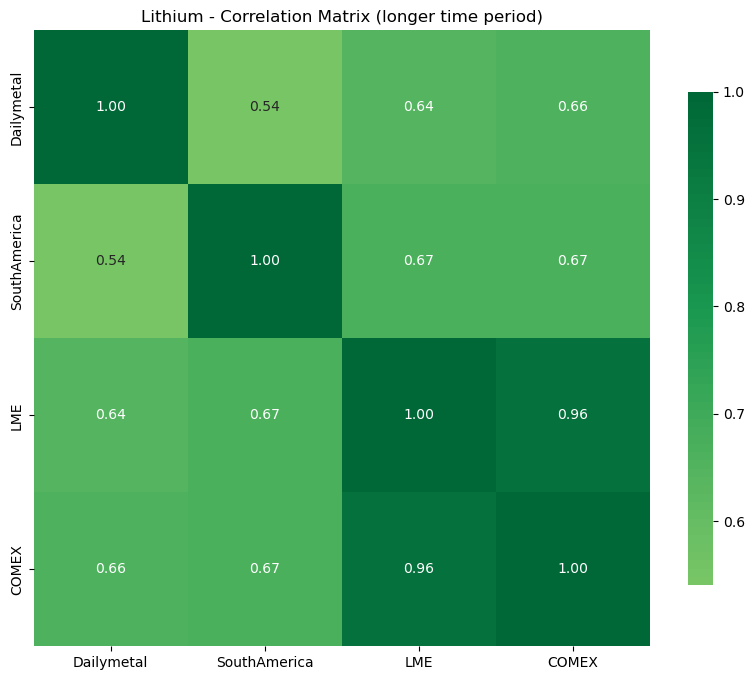

In [16]:
dfmerged2['Dailymetal'] = dfmerged2['Price_Lithium'].pct_change()
dfmerged2['SouthAmerica'] = dfmerged2['Price_SouthAmericaLOB'].pct_change()

dfmerged2['LME'] = dfmerged2['Price_LME'].pct_change()
dfmerged2['COMEX'] = dfmerged2['Price_COMEX'].pct_change()
dfmerged2.dropna(inplace=True)

correlation_matrix2 = dfmerged2[['Dailymetal', 'SouthAmerica', 'LME', 'COMEX']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Lithium - Correlation Matrix (longer time period)')
plt.show()

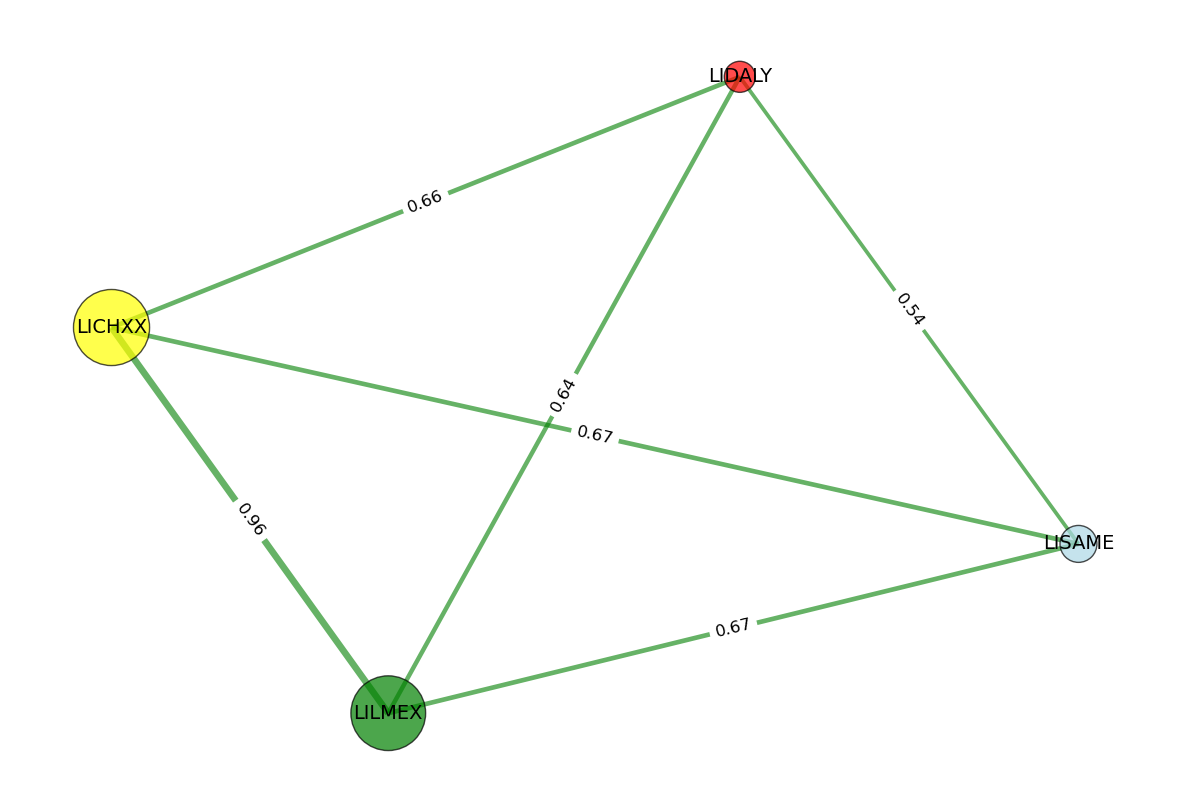


Node Centrality Values:
COMEX: 2.2900
LME: 2.2712
SouthAmerica: 1.8801
Dailymetal: 1.8432


In [17]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix2.columns)):
    for j in range(i + 1, len(correlation_matrix2.columns)):
        corr_value = correlation_matrix2.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix2.columns[i], correlation_matrix2.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=42)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    'Dailymetal': 'LIDALY',
    'SouthAmerica': 'LISAME',
    'COMEX': 'LICHXX',
    'LME': 'LILMEX'
}

# Draw labels with bigger font size
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=14)

# Add correlation values as edge labels with bigger font size
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/lithium_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")


In [18]:
from colorama import Fore, Style, init

# Define pairs of time series for cointegration tests, including the new series
pairs = [
    ('Price_Lithium', 'Price_SouthAmericaLOB'),
    ('Price_Lithium', 'Price_Lithium_Hydroxide'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Hydroxide'),
    ('Price_Lithium', 'Price_Lithium_Americas'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Americas'),
    ('Price_Lithium_Hydroxide', 'Price_Lithium_Americas'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_EastAsia_Lithium_Carbonate', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade')
]

# Perform tests and collect results
results = []
for series1, series2 in pairs:
    score, p_value, _ = coint(df_merged[series1], df_merged[series2])
    results.append((series1, series2, score, p_value))

# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Lithium                           Price_SouthAmericaLOB                   -2.3045        0.3713         
Price_Lithium                           Price_Lithium_Hydroxide                 -2.1319        0.4597         
Price_SouthAmericaLOB                   Price_Lithium_Hydroxide                 -1.2812        0.8354         
Price_Lithium                           Price_Lithium_Americas                  -2.4988        0.2796         
Price_SouthAmericaLOB                   Price_Lithium_Americas                  -1.8174        0.6212         
Price_Lithium_Hydroxide                 Price_Lithium_Americas                  -1.9195        0.5701         
Price_Lithium                           Price_EastAsia_Lithium_Carbonate        -2.6263        0.2272         
Price_SouthAmericaLOB                   Price_EastAsia_Lithium_Carbonate        -3.1

In [19]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")

# Define ticker mapping
ticker_map = {
    "Price_Lithium": "LIDALY",
    "Price_SouthAmericaLOB": "LISAME",
    "Price_Lithium_Hydroxide": "LICHXX",
    "Price_Lithium_Americas": "LILAMC",
    "Price_EastAsia_Lithium_Carbonate": "LIEALC",
    "Price_EastAsia_Lithium_Carbonate_Battery_Grade": "LIEABG",
    "Price_LME_Lithium": "LILMEX"
}

for series1, series2, score, p_value in results:
    # Get ticker symbols, fallback to original name if not in mapping
    ticker1 = ticker_map.get(series1, series1.replace("_", "\\_"))
    ticker2 = ticker_map.get(series2, series2.replace("_", "\\_"))
    p_value_str = f"\\textcolor{{green}}{{{p_value:.4f}}}" if p_value < 0.05 else f"{p_value:.4f}"
    print(f"{ticker1} & {ticker2} & {score:.4f} & {p_value_str} \\\\")

print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
LIDALY & LISAME & -2.3045 & 0.3713 \\
LIDALY & LICHXX & -2.1319 & 0.4597 \\
LISAME & LICHXX & -1.2812 & 0.8354 \\
LIDALY & LILAMC & -2.4988 & 0.2796 \\
LISAME & LILAMC & -1.8174 & 0.6212 \\
LICHXX & LILAMC & -1.9195 & 0.5701 \\
LIDALY & LIEALC & -2.6263 & 0.2272 \\
LISAME & LIEALC & -3.1678 & 0.0755 \\
LICHXX & LIEALC & -3.3735 & \textcolor{green}{0.0454} \\
LILAMC & LIEALC & -3.7147 & \textcolor{green}{0.0175} \\
LIEALC & LIEABG & -2.8815 & 0.1411 \\
LIDALY & LIEABG & -2.8052 & 0.1640 \\
LISAME & LIEABG & -2.6955 & 0.2012 \\
LICHXX & LIEABG & -2.9789 & 0.1153 \\
LILAMC & LIEABG & -3.6301 & \textcolor{green}{0.0225} \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results}
\label{tab:cointegration}
\end{table}


In [20]:
# Export the merged dataframe to a CSV file
# It should contain the Date and all price columns
df_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_inner.csv', index=False)

# Nickel

In [21]:
# Load Nickel data source #1 - Nickel prices per pound from Dailymetalprice
dfn1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Nickel_prices_2017-01-01_to_2025-10-31_merged.csv')
dfn1['Date'] = pd.to_datetime(dfn1['Date'])
dfn1['Price'] = dfn1['Price'].astype(float)
dfn1 = dfn1.drop(columns=['Unit'])
dfn1 = dfn1.drop_duplicates(subset=['Date'])
dfn1.head()

,Date,Price
0,2017-01-02,4.5196
3,2017-01-03,4.6266
6,2017-01-04,4.5223
9,2017-01-05,4.6380
12,2017-01-06,4.6176


In [22]:
# Load Nickel data source #2 - Nickel HLOC from LME
dfn2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/nickel_HLOC_2017_2024.csv', sep=';')
dfn2['Date'] = pd.to_datetime(dfn2['Date'], dayfirst=True)
dfn2 = dfn2.rename(columns={'PX_LAST': 'Price'})
dfn2['Price'] = dfn2['Price'].astype(float)
dfn2 = dfn2.drop(index=0)
dfn2 = dfn2.sort_values(by='Date')
dfn2 = dfn2.iloc[:, :2] 
dfn2['Price'] = dfn2['Price']
dfn2.head()

,Date,Price
2014,2016-12-30,10020.0
2013,2017-01-03,9910.0
2012,2017-01-04,10220.0
2011,2017-01-05,10295.0
2010,2017-01-06,10245.0


In [23]:
# Load Nickel data source #3 - Nickel Miners ETF
dfn3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Sprott Nickel Prices ETF.csv', sep=';')
dfn3 = dfn3.rename(columns={'Exchange Date': 'Date'})
dfn3 = dfn3.rename(columns={'Close' : 'Price'})

# Replace German month abbreviations with English using month_map and replace_month
dfn3['Date'] = dfn3['Date'].apply(replace_month)
dfn3['Date'] = pd.to_datetime(dfn3['Date'], format='mixed', dayfirst=True)

dfn3['Price'] = dfn3['Price'].str.replace(',', '.').astype(float)
dfn3 = dfn3.sort_values(by='Date')
dfn3 = dfn3.iloc[:, :2]
dfn3.head()

,Date,Price
0,2023-03-22,20.82
1,2023-03-23,20.75
2,2023-03-24,20.79
3,2023-03-27,20.80
4,2023-03-28,21.51


In [24]:
# Load Nickel data source #4 - SHFE Nickel Future 1M
dfn4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SHFE Nickel Commodity Future Continuation 1.csv', sep=';')
dfn4 = dfn4.iloc[:, :2]  # Keep only the first 2 columns

# Replace German month abbreviations with English using replace_month
dfn4['Date'] = dfn4['Date'].apply(replace_month)

dfn4['Date'] = pd.to_datetime(dfn4['Date'], format='mixed', dayfirst=True)
dfn4['Price'] = dfn4['Price'].str.replace(',', '.').astype(float)
dfn4 = dfn4.sort_values(by='Date')
dfn4.head()

,Date,Price
2026,2017-01-03,84.78
2025,2017-01-04,82.91
2024,2017-01-05,83.91
2023,2017-01-06,83.51
2022,2017-01-09,84.42


In [25]:
# Load Nickel data source #5 - WUXI Nickel Future 1M
dfn5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/WUXI Metal Nickel Monthly Continuation 1.csv', sep=';')
dfn5 = dfn5.iloc[:, :2]  # Keep only the first 2 columns
dfn5['Date'] = pd.to_datetime(dfn5['Date'], format='%d-%b-%Y')
dfn5 = dfn5.sort_values(by='Date')
dfn5.head()

,Date,Price
2423,2017-01-03,83.60
2422,2017-01-04,84.00
2421,2017-01-05,84.30
2420,2017-01-06,84.15
2419,2017-01-09,85.25


In [26]:
# Load Nickel data source #6 - India Nickel Future 1M
dfn6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Multi Commodity Exchange Of India Nickel Commodity Future Continuation 1.csv', sep=';')
dfn6 = dfn6.iloc[:, :2]  # Keep only the first 2 columns
# Replace German month abbreviations with English
dfn6['Date'] = dfn6['Date'].apply(replace_month)
dfn6['Date'] = pd.to_datetime(dfn6['Date'], format='mixed', dayfirst=True)
dfn6 = dfn6.sort_values(by='Date')
dfn6['Price'] = dfn6['Price'].str.replace(',', '').astype(float)
dfn6.head()

,Date,Price
2149,2017-01-02,690.7
2148,2017-01-03,683.8
2147,2017-01-04,697.1
2146,2017-01-05,696.1
2145,2017-01-06,700.5


In [27]:
# Merge all three dataframes on the 'Date' column
dfn_merged = pd.merge(dfn1, dfn2, on='Date', suffixes=('_Nickel', '_LME'))
dfn_merged = pd.merge(dfn_merged, dfn3[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_ETF'})
dfn_merged = pd.merge(dfn_merged, dfn4[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_SHFE'})
dfn_merged = pd.merge(dfn_merged, dfn5[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_WUXI'})
dfn_merged = pd.merge(dfn_merged, dfn6[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_India'})

# Convert all price columns to float
dfn_merged['Price_Nickel'] = dfn_merged['Price_Nickel'].astype(float)
dfn_merged['Price_LME'] = dfn_merged['Price_LME'].astype(float)
dfn_merged['Price_ETF'] = dfn_merged['Price_ETF'].astype(float)
dfn_merged['Price_SHFE'] = dfn_merged['Price_SHFE'].astype(float)
dfn_merged['Price_WUXI'] = dfn_merged['Price_WUXI'].astype(float)
dfn_merged['Price_India'] = dfn_merged['Price_India'].astype(float)

In [28]:
print(f"First observation date: {df_merged['Date'].min()}, Last observation date: {df_merged['Date'].max()}")

First observation date: 2023-10-04 00:00:00, Last observation date: 2024-12-11 00:00:00


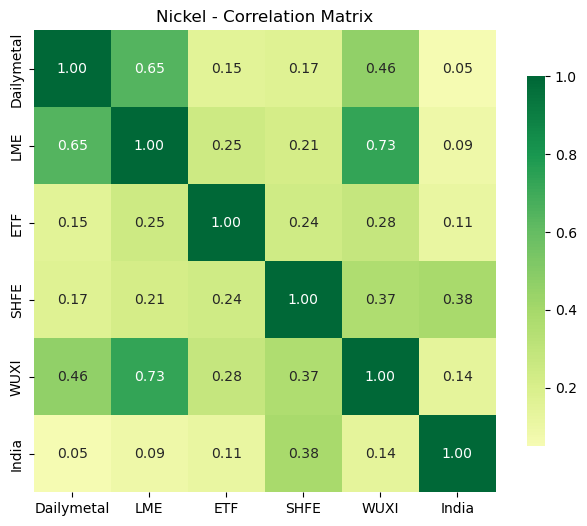

In [29]:
# Calculate the correlation matrix using the returns
dfn_merged['Dailymetal'] = dfn_merged['Price_Nickel'].pct_change()
dfn_merged['LME'] = dfn_merged['Price_LME'].pct_change()
dfn_merged['ETF'] = dfn_merged['Price_ETF'].pct_change()
dfn_merged['SHFE'] = dfn_merged['Price_SHFE'].pct_change()
dfn_merged['WUXI'] = dfn_merged['Price_WUXI'].pct_change()
dfn_merged['India'] = dfn_merged['Price_India'].pct_change()
# Drop NaN values
dfn_merged = dfn_merged.dropna(subset=['Dailymetal', 'LME', 'ETF', 'SHFE', 'WUXI', 'India'])
# Calculate the correlation matrix
correlation_matrix_nickel = dfn_merged[['Dailymetal', 'LME', 'ETF', 'SHFE', 'WUXI', 'India']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_nickel, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Nickel - Correlation Matrix')
plt.show()

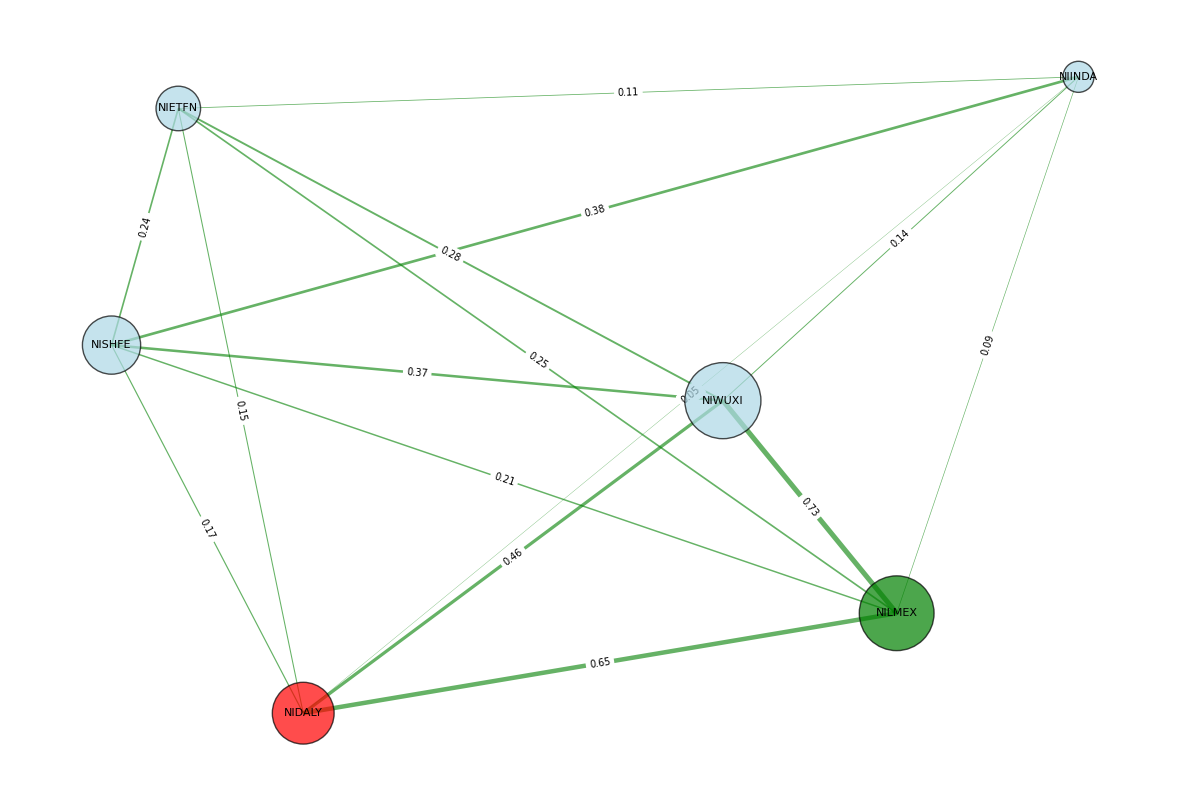


Node Centrality Values:
WUXI: 1.9747
LME: 1.9259
Dailymetal: 1.4846
SHFE: 1.3775
ETF: 1.0275
India: 0.7738


In [30]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix_nickel.columns)):
    for j in range(i + 1, len(correlation_matrix_nickel.columns)):
        corr_value = correlation_matrix_nickel.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix_nickel.columns[i], correlation_matrix_nickel.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=44)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    "Dailymetal": "NIDALY",
    "LME": "NILMEX",
    "ETF": "NIETFN",
    "SHFE": "NISHFE",
    "WUXI": "NIWUXI",
    "India": "NIINDA"
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=8)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

# Create a legend for node colors
# from matplotlib.patches import Patch
# legend_elements = [
#     Patch(facecolor='red', label='Dailymetal'),
#     Patch(facecolor='green', label='LME'),
#     Patch(facecolor='yellow', label='COMEX'),
#     Patch(facecolor='lightblue', label='Other')
# ]
# plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))

# Add a note about node sizes
# plt.figtext(0.02, 0.02, 'Node size represents centrality (sum of absolute edge weights)', fontsize=10, style='italic')

# plt.title('Lithium - Correlation Network', pad=20)
plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/nickel_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")

In [31]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint

# Define pairs of time series for cointegration tests
pairs_nickel = [
    ('Price_Nickel', 'Price_LME'),
    ('Price_Nickel', 'Price_ETF'),
    ('Price_LME', 'Price_ETF'),
    ('Price_Nickel', 'Price_SHFE'),
    ('Price_LME', 'Price_SHFE'),
    ('Price_ETF', 'Price_SHFE'),
    ('Price_Nickel', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    ('Price_ETF', 'Price_WUXI'),
    ('Price_SHFE', 'Price_WUXI'),
    ('Price_Nickel', 'Price_India'),
    ('Price_LME', 'Price_India'),
    ('Price_ETF', 'Price_India'),
    ('Price_SHFE', 'Price_India'),
    ('Price_WUXI', 'Price_India')
]
# Perform tests and collect results
results_nickel = []
for series1, series2 in pairs_nickel:
    score, p_value, _ = coint(dfn_merged[series1], dfn_merged[series2])
    results_nickel.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Nickel Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_nickel:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Nickel Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Nickel                            Price_LME                               -5.3987        0.0000         
Price_Nickel                            Price_ETF                               -3.2338        0.0645         
Price_LME                               Price_ETF                               -3.0985        0.0886         
Price_Nickel                            Price_SHFE                              -2.9393        0.1253         
Price_LME                               Price_SHFE                              -2.8389        0.1536         
Price_ETF                               Price_SHFE                              -2.4327        0.3096         
Price_Nickel                            Price_WUXI                              -2.3036        0.3718         
Price_LME                               Price_WUXI                           

In [32]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")
# Define ticker mapping
ticker_map = {
    "Price_Nickel": "NIDALY",
    "Price_LME": "NILMEX",
    "Price_ETF": "NIETFN",
    "Price_SHFE": "NISHFE",
    "Price_WUXI": "NIWUXI",
    "Price_India": "NIINDA"
}

for series1, series2, score, p_value in results_nickel:
    # Get ticker symbols, fallback to original name if not in mapping
    ticker1 = ticker_map.get(series1, series1.replace("_", "\\_"))
    ticker2 = ticker_map.get(series2, series2.replace("_", "\\_"))
    # Color p-values < 0.05 in green
    p_value_str = f"\\textcolor{{green}}{{{p_value:.4f}}}" if p_value < 0.05 else f"{p_value:.4f}"
    print(f"{ticker1} & {ticker2} & {score:.4f} & {p_value_str} \\\\")

print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
NIDALY & NILMEX & -5.3987 & \textcolor{green}{0.0000} \\
NIDALY & NIETFN & -3.2338 & 0.0645 \\
NILMEX & NIETFN & -3.0985 & 0.0886 \\
NIDALY & NISHFE & -2.9393 & 0.1253 \\
NILMEX & NISHFE & -2.8389 & 0.1536 \\
NIETFN & NISHFE & -2.4327 & 0.3096 \\
NIDALY & NIWUXI & -2.3036 & 0.3718 \\
NILMEX & NIWUXI & -2.5628 & 0.2521 \\
NIETFN & NIWUXI & -2.6758 & 0.2084 \\
NISHFE & NIWUXI & -8.5763 & \textcolor{green}{0.0000} \\
NIDALY & NIINDA & -7.8728 & \textcolor{green}{0.0000} \\
NILMEX & NIINDA & -7.4537 & \textcolor{green}{0.0000} \\
NIETFN & NIINDA & -2.2388 & 0.4044 \\
NISHFE & NIINDA & -2.4862 & 0.2852 \\
NIWUXI & NIINDA & -2.9929 & 0.1119 \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results}
\label{tab:cointegration}
\end{table}


### Without the ETF

In [33]:
# Merge all three dataframes on the 'Date' column
dfn_merged = pd.merge(dfn1, dfn2, on='Date', suffixes=('_Nickel', '_LME'))
dfn_merged = pd.merge(dfn_merged, dfn4[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_SHFE'})
dfn_merged = pd.merge(dfn_merged, dfn5[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_WUXI'})
dfn_merged = pd.merge(dfn_merged, dfn6[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_India'})

# Convert all price columns to float
dfn_merged['Price_Nickel'] = dfn_merged['Price_Nickel'].astype(float)
dfn_merged['Price_LME'] = dfn_merged['Price_LME'].astype(float)
dfn_merged['Price_SHFE'] = dfn_merged['Price_SHFE'].astype(float)
dfn_merged['Price_WUXI'] = dfn_merged['Price_WUXI'].astype(float)
dfn_merged['Price_India'] = dfn_merged['Price_India'].astype(float)

print(f"First observation date: {dfn_merged['Date'].min()}, Last observation date: {dfn_merged['Date'].max()}")

First observation date: 2017-01-03 00:00:00, Last observation date: 2024-12-27 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/1612453971.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfn_merged['India'] = dfn_merged['Price_India'].pct_change()


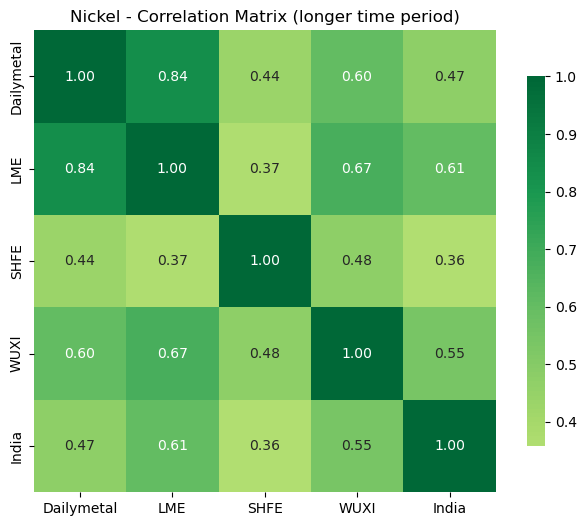

In [34]:
# Calculate the correlation matrix using the returns
dfn_merged['Dailymetal'] = dfn_merged['Price_Nickel'].pct_change()
dfn_merged['LME'] = dfn_merged['Price_LME'].pct_change()
dfn_merged['SHFE'] = dfn_merged['Price_SHFE'].pct_change()
dfn_merged['WUXI'] = dfn_merged['Price_WUXI'].pct_change()
dfn_merged['India'] = dfn_merged['Price_India'].pct_change()
# Drop NaN values
dfn_merged = dfn_merged.dropna(subset=['Dailymetal', 'LME', 'SHFE', 'WUXI', 'India'])
# Calculate the correlation matrix
correlation_matrix_nickel = dfn_merged[['Dailymetal', 'LME', 'SHFE', 'WUXI', 'India']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_nickel, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Nickel - Correlation Matrix (longer time period)')
plt.show()

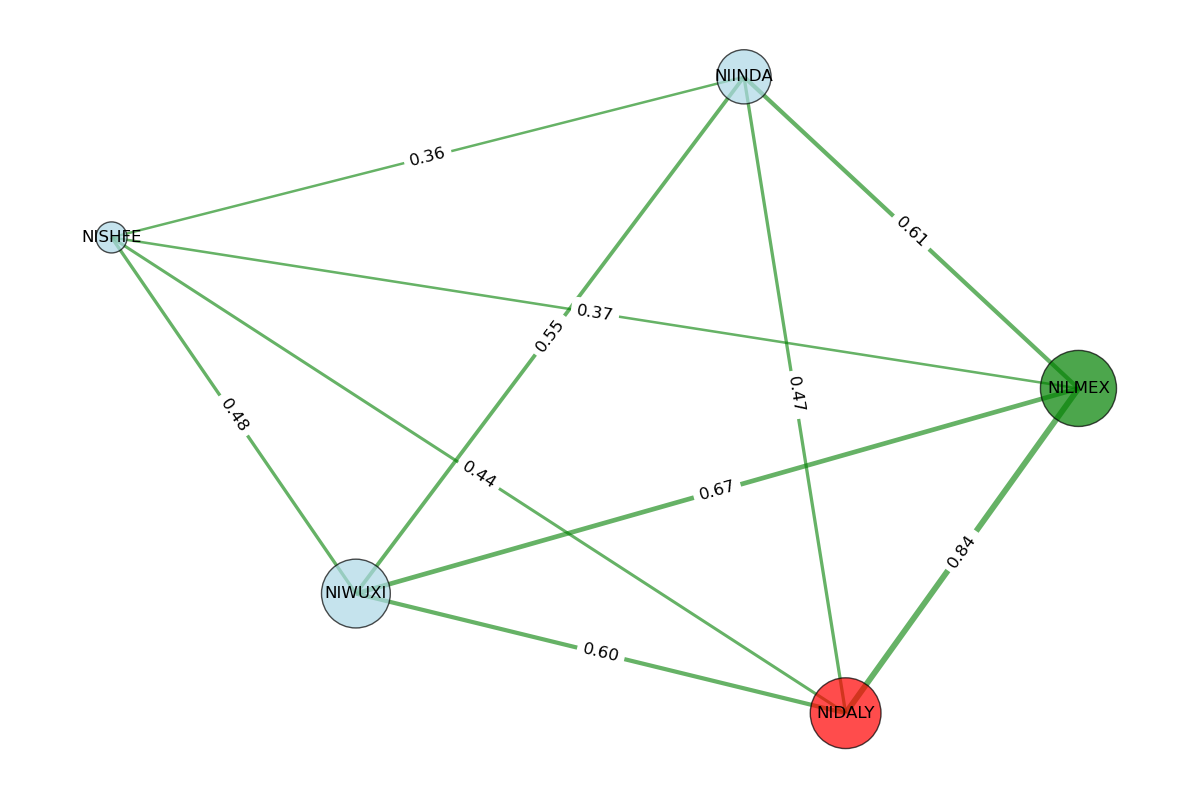


Node Centrality Values:
LME: 2.4890
Dailymetal: 2.3512
WUXI: 2.3026
India: 1.9855
SHFE: 1.6375


In [35]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix_nickel.columns)):
    for j in range(i + 1, len(correlation_matrix_nickel.columns)):
        corr_value = correlation_matrix_nickel.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix_nickel.columns[i], correlation_matrix_nickel.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=44)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    "Dailymetal": "NIDALY",
    "LME": "NILMEX",
    "SHFE": "NISHFE",
    "WUXI": "NIWUXI",
    "India": "NIINDA"
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=12)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# plt.title('Lithium - Correlation Network', pad=20)
plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/nickel_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")

In [36]:
dfn_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_inner.csv', index=False)

# Cobalt

In [37]:
# Load Cobalt data source #1 - Cobalt prices per pound from Dailymetalprice
dfc1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Cobalt_prices_2017-01-01_to_2025-10-31_merged.csv')
dfc1['Date'] = pd.to_datetime(dfc1['Date'])
dfc1['Price'] = dfc1['Price'].astype(float)
dfc1 = dfc1.drop(columns=['Unit'])
dfc1 = dfc1.drop_duplicates(subset=['Date'])
dfc1 = dfc1.sort_values(by='Date')
dfc1.head()

,Date,Price
0,2017-01-02,14.855
3,2017-01-03,14.742
6,2017-01-04,14.742
9,2017-01-05,14.742
12,2017-01-06,14.742


In [38]:
# Load Cobalt data source #2 - Cobalt HLOC from LME
dfc2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/cobalt_HLOC_2017_2024.csv', sep=';')
dfc2['Date'] = pd.to_datetime(dfc2['Date'], dayfirst=True)
dfc2 = dfc2.rename(columns={'PX_LAST': 'Price'})
# Replace commas with dots and convert the 'Price' column to float
dfc2['Price'] = dfc2['Price'].str.replace(',', '.').astype(float)
dfc2 = dfc2.drop(index=0)
dfc2 = dfc2.sort_values(by='Date')
dfc2 = dfc2.iloc[:, :2]
dfc2['Price'] = dfc2['Price']
dfc2.head()

,Date,Price
2019,2016-12-30,32734.0
2018,2017-01-03,32735.0
2017,2017-01-04,32736.0
2016,2017-01-05,32739.5
2015,2017-01-06,32740.5


In [39]:
# Load Cobalt data source #3 - LME 3 Month Cobalt Composite Forward
dfc3 = pd.read_csv('data/reuters_data/LME 3 Month Cobalt Composite Commodity Forward .csv', sep=';')
dfc3 = dfc3.iloc[:, :2]
dfc3 = dfc3.rename(columns={'Close' : 'Price'})
dfc3['Date'] = pd.to_datetime(dfc3['Date'], format='%d-%b-%Y')
# Clean the 'Price' column by removing non-breaking spaces and replacing commas with dots
dfc3['Price'] = dfc3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfc3['Price'] = dfc3['Price']
dfc3.head()

,Date,Price
0,2017-01-03,32750.0
1,2017-01-04,32750.0
2,2017-01-05,32750.0
3,2017-01-06,32750.0
4,2017-01-09,32750.0


In [40]:
# Load Cobalt data source #4 - LME Cobalt SPOT
# dfc4 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/LME Cobalt SPOT.csv', sep=';')
# dfc4 = dfc4.iloc[:, :2]
# dfc4 = dfc4.rename(columns={'Close Price' : 'Price'})
# dfc4['Date'] = pd.to_datetime(dfc4['Date'], format='%m/%d/%y')
# dfc4 = dfc4.sort_values(by='Date')
# dfc4['Price'] = dfc4['Price'].str.replace(',', '.').astype(float)
# dfc4['Price'] = dfc4['Price']
# dfc4.head()

In [41]:
# Load Cobalt data source #5 - LME All Location Cobalt Total Stock Commodity Statistics Contract 
dfc5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/LME All Location Cobalt Total Stock Commodity Statistics Contract .csv', sep=';')
dfc5 = dfc5.iloc[:, :2]
dfc5 = dfc5.rename(columns={'Close' : 'Price'})
dfc5 = dfc5.rename(columns={'Exchange Date': 'Date'})
dfc5['Date'] = dfc5['Date'].apply(replace_month)
dfc5['Date'] = pd.to_datetime(dfc5['Date'], format='mixed', dayfirst=True)
dfc5['Price'] = dfc5['Price'].astype(str).str.replace(',', '.').astype(float)
dfc5 = dfc5.sort_values(by='Date')
dfc5.head()

,Date,Price
2111,2017-01-03,691.0
2110,2017-01-04,676.0
2109,2017-01-05,676.0
2108,2017-01-06,676.0
2107,2017-01-09,676.0


In [42]:
# Load Cobalt data source #6 - WUXI Cobalt Bi-Monthly Future
dfc6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/WUXI Metal Nickel Monthly Continuation 1.csv', sep=';')
dfc6 = dfc6.iloc[:, :2]
dfc6['Date'] = pd.to_datetime(dfc6['Date'], format='%d-%b-%Y')
dfc6['Price'] = dfc6['Price'].astype(float)
dfc6 = dfc6.sort_values(by='Date')
dfc6.head()

,Date,Price
2423,2017-01-03,83.60
2422,2017-01-04,84.00
2421,2017-01-05,84.30
2420,2017-01-06,84.15
2419,2017-01-09,85.25


In [43]:
# Load Cobalt data source #7 - COMEX
dfc7 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX (CMX) Cobalt Metal (Fastmarkets) Electronic Commodity Future Continuation 1.csv', sep=';')
dfc7 = dfc7.iloc[:, :2]

# Replace German month abbreviations with English using month_map and replace_month
def replace_month(date_str):
	for de_month, en_month in month_map.items():
		date_str = re.sub(rf'\b{de_month}\b', en_month, date_str)
	return date_str

dfc7['Date'] = dfc7['Date'].apply(replace_month)
dfc7['Date'] = pd.to_datetime(dfc7['Date'], format='mixed', dayfirst=True)
dfc7 = dfc7.sort_values(by='Date')
dfc7 = dfc7.dropna(subset=['Price'])
dfc7.head()

,Date,Price
1099,2020-12-28,16.0
1098,2020-12-29,16.0
1097,2020-12-30,16.0
1096,2020-12-31,16.0
1095,2021-01-04,16.0


In [44]:
dfc_merged = pd.merge(dfc1, dfc2, on='Date', suffixes=('_Cobalt', '_LME'))
dfc_merged = pd.merge(dfc_merged, dfc3[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_3M'})
# dfc_merged = pd.merge(dfc_merged, dfc4[['Date', 'Price']], on='Date', how='inner')
# dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_SPOT'})
dfc_merged = pd.merge(dfc_merged, dfc5[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_All_Location_Stock'})
dfc_merged = pd.merge(dfc_merged, dfc6[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_WUXI'})
dfc_merged = pd.merge(dfc_merged, dfc7[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_COMEX'})
# Convert all price columns to float
dfc_merged['Price_Cobalt'] = dfc_merged['Price_Cobalt'].astype(float)
dfc_merged['Price_LME'] = dfc_merged['Price_LME'].astype(float)
dfc_merged['Price_LME_3M'] = dfc_merged['Price_LME_3M'].astype(float)
# dfc_merged['Price_LME_SPOT'] = dfc_merged['Price_LME_SPOT'].astype(float)
dfc_merged['Price_LME_All_Location_Stock'] = dfc_merged['Price_LME_All_Location_Stock'].astype(float)
dfc_merged['Price_WUXI'] = dfc_merged['Price_WUXI'].astype(float)
dfc_merged['Price_COMEX'] = dfc_merged['Price_COMEX'].astype(float)

In [45]:
print(f"First observation date: {dfc_merged['Date'].min()}, Last observation date: {dfc_merged['Date'].max()}")

First observation date: 2020-12-29 00:00:00, Last observation date: 2024-12-24 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/3087967925.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()


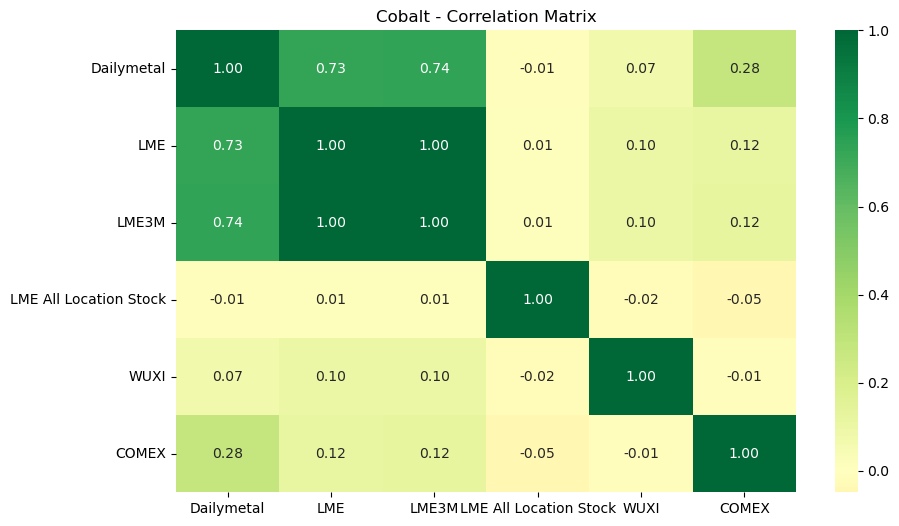

In [46]:
# Calculate the correlation matrix using the returns
dfc_merged['Dailymetal'] = dfc_merged['Price_Cobalt'].pct_change()
dfc_merged['LME'] = dfc_merged['Price_LME'].pct_change()
dfc_merged['LME3M'] = dfc_merged['Price_LME_3M'].pct_change()
# dfc_merged['Returns_LMESpot'] = dfc_merged['Price_LME_SPOT'].pct_change()
dfc_merged['LME All Location Stock'] = dfc_merged['Price_LME_All_Location_Stock'].pct_change()
dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()
dfc_merged['COMEX'] = dfc_merged['Price_COMEX'].pct_change()
# Drop NaN values
dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME3M', 'LME All Location Stock', 'WUXI', 'COMEX'])
# dfc_merged = dfc_merged.dropna(subset=['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot', 'Returns_LME_All_Location_Stock', 'Returns_WUXI', 'Returns_COMEX'])
# dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI', 'COMEX'])
# Calculate the correlation matrix
# correlation_matrix_cobalt = dfc_merged[['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot', 'Returns_LME_All_Location_Stock', 'Returns_WUXI', 'Returns_COMEX']].corr()
correlation_matrix_cobalt = dfc_merged[['Dailymetal', 'LME', 'LME3M', 'LME All Location Stock', 'WUXI', 'COMEX']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cobalt, annot=True, center=0, cmap='RdYlGn', fmt='.2f')
plt.title('Cobalt - Correlation Matrix')
plt.show()

In [47]:
print(correlation_matrix_cobalt.columns)

Index(['Dailymetal', 'LME', 'LME3M', 'LME All Location Stock', 'WUXI',
       'COMEX'],
      dtype='object')


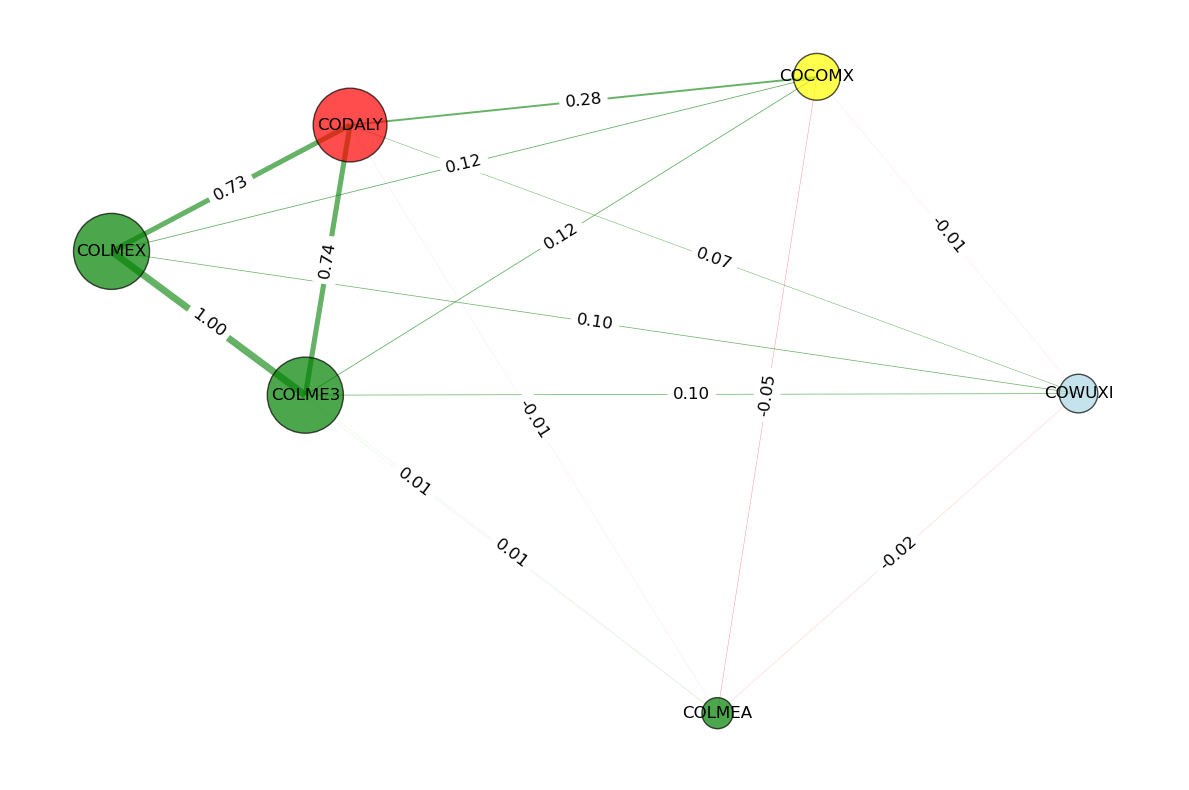


Node Centrality Values:
LME3M: 1.9658
LME: 1.9620
Dailymetal: 1.8304
COMEX: 0.5781
WUXI: 0.3090
LME All Location Stock: 0.1063


In [48]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix_cobalt.columns)):
    for j in range(i + 1, len(correlation_matrix_cobalt.columns)):
        corr_value = correlation_matrix_cobalt.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix_cobalt.columns[i], correlation_matrix_cobalt.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=1)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    "Dailymetal": "CODALY",
    "LME": "COLMEX",
    "LME3M": "COLME3",
    "LME All Location Stock": "COLMEA",
    "WUXI": "COWUXI",
    "COMEX": "COCOMX"
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=12)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/cobalt_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")

In [49]:
dfc_merged.head()

,Date,Price_Cobalt,Price_LME,Price_LME_3M,Price_LME_All_Location_Stock,Price_WUXI,Price_COMEX,Dailymetal,LME,LME3M,LME All Location Stock,WUXI,COMEX
1,2020-12-30,15.446,31998.0,32190.0,451.0,124.20,16.0,0.057873,0.000203,0.000000,0.00000,-0.012326,0.0
2,2020-12-31,15.450,31998.0,32190.0,451.0,122.35,16.0,0.000259,0.000000,0.000000,0.00000,-0.014895,0.0
3,2021-01-04,15.350,33000.0,33000.0,451.0,128.20,16.0,-0.006472,0.031314,0.025163,0.00000,0.047814,0.0
4,2021-01-05,15.350,34000.0,34000.0,451.0,129.20,16.0,0.000000,0.030303,0.030303,0.00000,0.007800,0.0
5,2021-01-06,15.950,35500.0,35500.0,440.0,129.55,16.0,0.039088,0.044118,0.044118,-0.02439,0.002709,0.0


In [50]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
# dfc_merged = dfc_merged.rename(columns={'Price_Cobalt': 'Dailymetalprice'})
pairs_cobalt = [
    ('Price_Cobalt', 'Price_LME'),
    ('Price_Cobalt', 'Price_LME_3M'),  
    ('Price_LME', 'Price_LME_3M'),     
    ('Price_Cobalt', 'Price_LME_All_Location_Stock'),
    ('Price_LME', 'Price_LME_All_Location_Stock'),
    ('Price_LME_3M', 'Price_LME_All_Location_Stock'),  
    ('Price_Cobalt', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    ('Price_LME_3M', 'Price_WUXI'),    
    ('Price_LME_All_Location_Stock', 'Price_WUXI'),
    ('Price_Cobalt', 'Price_COMEX'),
    ('Price_LME', 'Price_COMEX'),
    ('Price_LME_3M', 'Price_COMEX'),   
    ('Price_LME_All_Location_Stock', 'Price_COMEX'),
    ('Price_WUXI', 'Price_COMEX')
]
dfc_merged = dfc_merged.dropna(subset=['Price_Cobalt', 'Price_LME', "Price_LME_3M", 'Price_LME_All_Location_Stock', 'Price_WUXI', 'Price_COMEX'])
# Perform tests and collect results
results_cobalt = []
for series1, series2 in pairs_cobalt:
    score, p_value, _ = coint(dfc_merged[series1], dfc_merged[series2])
    results_cobalt.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cobalt Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_cobalt:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Cobalt Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Cobalt                            Price_LME                               -6.3241        0.0000         
Price_Cobalt                            Price_LME_3M                            -6.1618        0.0000         
Price_LME                               Price_LME_3M                            -1.6183        0.7131         
Price_Cobalt                            Price_LME_All_Location_Stock            -2.6195        0.2290         
Price_LME                               Price_LME_All_Location_Stock            -2.5439        0.2601         
Price_LME_3M                            Price_LME_All_Location_Stock            -2.5091        0.2751         
Price_Cobalt                            Price_WUXI                              -1.1814        0.8627         
Price_LME                               Price_WUXI                           

In [51]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")

# Define ticker mapping
ticker_map = {
    "Price_Cobalt": "CODALY",
    "Price_LME": "COLMEX",
    "Price_LME_3M": "COLME3",
    "Price_LME_All_Location_Stock": "COLMEA",
    "Price_WUXI": "COWUXI",
    "Price_COMEX": "COCOMX"
}

for series1, series2, score, p_value in results_cobalt:
    # Get ticker symbols, fallback to original name if not in mapping
    ticker1 = ticker_map.get(series1, series1.replace("_", "\\_"))
    ticker2 = ticker_map.get(series2, series2.replace("_", "\\_"))
    p_value_str = f"\\textcolor{{green}}{{{p_value:.4f}}}" if p_value < 0.05 else f"{p_value:.4f}"
    print(f"{ticker1} & {ticker2} & {score:.4f} & {p_value_str} \\\\")

print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results - Cobalt}")
print("\\label{tab:cointegration_cobalt}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
CODALY & COLMEX & -6.3241 & \textcolor{green}{0.0000} \\
CODALY & COLME3 & -6.1618 & \textcolor{green}{0.0000} \\
COLMEX & COLME3 & -1.6183 & 0.7131 \\
CODALY & COLMEA & -2.6195 & 0.2290 \\
COLMEX & COLMEA & -2.5439 & 0.2601 \\
COLME3 & COLMEA & -2.5091 & 0.2751 \\
CODALY & COWUXI & -1.1814 & 0.8627 \\
COLMEX & COWUXI & -1.1361 & 0.8739 \\
COLME3 & COWUXI & -1.1452 & 0.8717 \\
COLMEA & COWUXI & -3.5799 & \textcolor{green}{0.0259} \\
CODALY & COCOMX & -4.5604 & \textcolor{green}{0.0010} \\
COLMEX & COCOMX & -4.7057 & \textcolor{green}{0.0006} \\
COLME3 & COCOMX & -4.7339 & \textcolor{green}{0.0005} \\
COLMEA & COCOMX & -4.6306 & \textcolor{green}{0.0007} \\
COWUXI & COCOMX & -1.9429 & 0.5581 \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results - Cobalt}
\label{tab:cointegration_cobalt}
\end{table}


### Cobalt w/o COMEX

In [52]:
dfc_merged = pd.merge(dfc1, dfc2, on='Date', suffixes=('_Cobalt', '_LME'))
dfc_merged = pd.merge(dfc_merged, dfc5[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_All_Location_Stock'})
dfc_merged = pd.merge(dfc_merged, dfc6[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_WUXI'})

# Convert all price columns to float
dfc_merged['Price_Cobalt'] = dfc_merged['Price_Cobalt'].astype(float)
dfc_merged['Price_LME'] = dfc_merged['Price_LME'].astype(float)
dfc_merged['Price_LME_All_Location_Stock'] = dfc_merged['Price_LME_All_Location_Stock'].astype(float)
dfc_merged['Price_WUXI'] = dfc_merged['Price_WUXI'].astype(float)

dfc_merged['Dailymetal'] = dfc_merged['Price_Cobalt'].pct_change()
dfc_merged['LME'] = dfc_merged['Price_LME'].pct_change()
dfc_merged['LME All Location Stock'] = dfc_merged['Price_LME_All_Location_Stock'].pct_change()
dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()
# Drop NaN values
dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI'])

print(f"First observation date: {dfc_merged['Date'].min()}, Last observation date: {dfc_merged['Date'].max()}")

First observation date: 2017-01-04 00:00:00, Last observation date: 2024-12-24 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/2432380993.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()


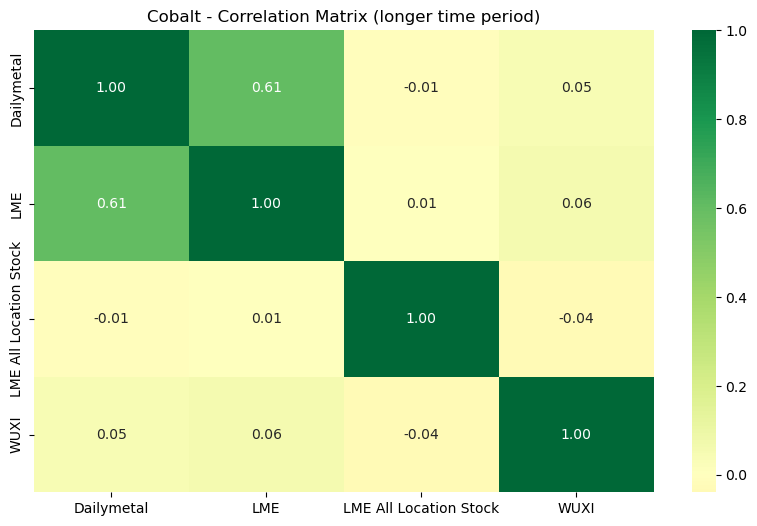

In [53]:
# Calculate the correlation matrix
correlation_matrix_cobalt = dfc_merged[['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cobalt, annot=True, center=0, cmap='RdYlGn', fmt='.2f')
plt.title('Cobalt - Correlation Matrix (longer time period)')
plt.show()

In [54]:
dfc_merged.head()

,Date,Price_Cobalt,Price_LME,Price_LME_All_Location_Stock,Price_WUXI,Dailymetal,LME,LME All Location Stock,WUXI
1,2017-01-04,14.742,32736.0,676.0,84.00,0.000000,0.000031,-0.021708,0.004785
2,2017-01-05,14.742,32739.5,676.0,84.30,0.000000,0.000107,0.000000,0.003571
3,2017-01-06,14.742,32740.5,676.0,84.15,0.000000,0.000031,0.000000,-0.001779
4,2017-01-09,14.742,32742.0,676.0,85.25,0.000000,0.000046,0.000000,0.013072
5,2017-01-10,14.855,32993.0,676.0,86.45,0.007665,0.007666,0.000000,0.014076


In [55]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_cobalt = [
    ('Price_Cobalt', 'Price_LME'),
    # ('Price_Cobalt', 'Price_LME_3M'),
    # ('Price_Cobalt', 'Price_LME_SPOT'),
    # ('Price_LME', 'Price_LME_3M'),
    # ('Price_LME', 'Price_LME_SPOT'),
    # ('Price_LME_3M', 'Price_LME_SPOT'),
    ('Price_Cobalt', 'Price_LME_All_Location_Stock'),
    ('Price_LME', 'Price_LME_All_Location_Stock'),
    # ('Price_LME_3M', 'Price_LME_All_Location_Stock'),
    # ('Price_LME_SPOT', 'Price_LME_All_Location_Stock'),
    ('Price_Cobalt', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    # ('Price_LME_3M', 'Price_WUXI'),
    # ('Price_LME_SPOT', 'Price_WUXI'),
    ('Price_LME_All_Location_Stock', 'Price_WUXI')
]
# Perform tests and collect results
results_cobalt = []
for series1, series2 in pairs_cobalt:
    # Drop rows with NaN or infinite values in the selected columns
    clean_data = dfc_merged[[series1, series2]].replace([np.inf, -np.inf], np.nan).dropna()
    score, p_value, _ = coint(clean_data[series1], clean_data[series2])
    results_cobalt.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cobalt Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_cobalt:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Cobalt Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Cobalt                            Price_LME                               -5.0328        0.0001         
Price_Cobalt                            Price_LME_All_Location_Stock            -1.5628        0.7363         
Price_LME                               Price_LME_All_Location_Stock            -1.6423        0.7027         
Price_Cobalt                            Price_WUXI                              -1.3653        0.8092         
Price_LME                               Price_WUXI                              -1.4329        0.7860         
Price_LME_All_Location_Stock            Price_WUXI                              -1.7092        0.6727         


In [56]:
dfc_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_inner.csv', index=False)

# Copper

In [57]:
# Load Copper data source #1 - Copper prices per pound from Dailymetalprice
dfcu1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Copper_prices_2017-01-01_to_2025-10-31_merged.csv')
dfcu1['Date'] = pd.to_datetime(dfcu1['Date'])
dfcu1['Price'] = dfcu1['Price'].astype(float)
dfcu1 = dfcu1.drop(columns=['Unit'])
dfcu1 = dfcu1.drop_duplicates(subset=['Date'])
dfcu1 = dfcu1.sort_values(by='Date')
dfcu1.head()

,Date,Price
0,2017-01-03,2.4810
5,2017-01-04,2.5480
10,2017-01-05,2.5295
15,2017-01-06,2.5380
20,2017-01-09,2.5300


In [58]:
# Load Copper data source #2 - Copper COMEX 1M Future
dfcu2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX Copper Electronic Commodity Future Continuation 1.csv', sep=';')
dfcu2 = dfcu2.rename(columns={'Exchange Date': 'Date'})
dfcu2 = dfcu2.rename(columns={'Close' : 'Price'})
# Replace German month abbreviations with English using replace_month
dfcu2['Date'] = dfcu2['Date'].apply(replace_month)
dfcu2['Date'] = pd.to_datetime(dfcu2['Date'], format='mixed', dayfirst=True)
dfcu2['Price'] = dfcu2['Price'].str.replace(',', '.').astype(float)
dfcu2 = dfcu2.iloc[:, :2]  
dfcu2 = dfcu2.sort_values(by='Date')
dfcu2.head()

,Date,Price
2103,2017-01-03,2.48
2102,2017-01-04,2.55
2101,2017-01-05,2.53
2100,2017-01-06,2.54
2099,2017-01-09,2.53


In [59]:
# Load Copper data source #3 - LME 3M Copper Composite Forward
dfcu3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/LME 3M Copper Composite Commodity Forward.csv', sep=';')
dfcu3 = dfcu3.rename(columns={'Exchange Date': 'Date'})
dfcu3 = dfcu3.rename(columns={'Close' : 'Price'})
# Replace German month abbreviations with English using replace_month
dfcu3['Date'] = dfcu3['Date'].apply(replace_month)
dfcu3['Date'] = pd.to_datetime(dfcu3['Date'], format='mixed', dayfirst=True)
# Remove non-breaking spaces, replace dots used as thousand separators, then convert to float
dfcu3['Price'] = (
	dfcu3['Price']
	.str.replace('\xa0', '', regex=False)
	.str.replace('.', '', regex=False)   # Remove thousand separator dots
	.str.replace(',', '.', regex=False)  # Replace decimal comma with dot
	.astype(float)
)
dfcu3 = dfcu3.sort_values(by='Date')
dfcu3 = dfcu3.iloc[:, :2]
dfcu3.head()

,Date,Price
2111,2017-01-03,5500.0
2110,2017-01-04,5644.0
2109,2017-01-05,5580.0
2108,2017-01-06,5590.0
2107,2017-01-09,5591.0


In [60]:
# Load Copper data source #4 - SMM Guixi Copper
dfcu4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SMM Guixi Copper .csv', sep=';')
dfcu4 = dfcu4.rename(columns={'Exchange Date': 'Date'})
dfcu4 = dfcu4.rename(columns={'Close' : 'Price'})
# Replace German month abbreviations with English using replace_month
dfcu4['Date'] = dfcu4['Date'].apply(replace_month)
dfcu4['Date'] = pd.to_datetime(dfcu4['Date'], format='mixed', dayfirst=True)
# Remove non-breaking spaces, then remove dots used as thousand separators, then replace decimal comma with dot
dfcu4['Price'] = (
	dfcu4['Trade Price']
	.str.replace('\xa0', '', regex=False)
	.str.replace('.', '', regex=False)   # Remove thousand separator dots
	.str.replace(',', '.', regex=False)  # Replace decimal comma with dot
	.astype(float)
)
dfcu4 = dfcu4.drop(index=0)
dfcu4 = dfcu4.sort_values(by='Date')
dfcu4 = dfcu4.iloc[:, [0, -1]]
dfcu4.head()

,Date,Price
2028,2017-01-01,51420.0
2027,2017-01-03,45710.0
2026,2017-01-04,44770.0
2025,2017-01-05,45510.0
2024,2017-01-06,45195.0


In [61]:
# Load Copper data source #5 - SHFE Copper Future 1M
dfcu5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SHFE Copper Commodity Future Continuation 1.csv', sep=';')
dfcu5 = dfcu5.rename(columns={'Exchange Date': 'Date'})
dfcu5 = dfcu5.rename(columns={'Close' : 'Price'})
dfcu5['Date'] = pd.to_datetime(dfcu5['Date'], format='%d-%b-%Y')
dfcu5['Price'] = dfcu5['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu5 = dfcu5.sort_values(by='Date')
dfcu5 = dfcu5.iloc[:, :2]
dfcu5.head()

,Date,Price
2026,2017-01-03,45780.0
2025,2017-01-04,45000.0
2024,2017-01-05,45560.0
2023,2017-01-06,45160.0
2022,2017-01-09,45330.0


In [62]:
# Load Copper data source #6 - Sprott Copper Miners ETF
dfcu6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Sprott Copper Miners ETF.csv', sep=';')
dfcu6 = dfcu6.rename(columns={'Exchange Date': 'Date'})
dfcu6 = dfcu6.rename(columns={'Close' : 'Price'})
dfcu6['Date'] = dfcu6['Date'].apply(replace_month)
dfcu6['Date'] = pd.to_datetime(dfcu6['Date'], format='mixed', dayfirst=True)
dfcu6['Price'] = dfcu6['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu6 = dfcu6.sort_values(by='Date')
dfcu6 = dfcu6.drop(index=0)
dfcu6 = dfcu6.iloc[:, :2]
dfcu6 = dfcu6.sort_values(by='Date')
dfcu6.head()

,Date,Price
297,2024-03-06,20.15
296,2024-03-07,20.68
295,2024-03-08,20.57
294,2024-03-11,20.82
293,2024-03-12,20.81


In [63]:
# Merge all five dataframes on the 'Date' column
dfcu_merged = pd.merge(dfcu1, dfcu2, on='Date', suffixes=('_Dailymetal', '_COMEX'))
dfcu_merged = pd.merge(dfcu_merged, dfcu3[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_LME_3M'})
dfcu_merged = pd.merge(dfcu_merged, dfcu4[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SMM_Guixi'})
dfcu_merged = pd.merge(dfcu_merged, dfcu5[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SHFE'})
# Convert all price columns to float
dfcu_merged['Price_Dailymetal'] = dfcu_merged['Price_Dailymetal'].astype(float)
dfcu_merged['Price_COMEX'] = dfcu_merged['Price_COMEX'].astype(float)
dfcu_merged['Price_LME_3M'] = dfcu_merged['Price_LME_3M'].astype(float)
dfcu_merged['Price_SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].astype(float)
dfcu_merged['Price_SHFE'] = dfcu_merged['Price_SHFE'].astype(float)

In [64]:
print(f"First observation date: {dfcu_merged['Date'].min()}, Last observation date: {dfcu_merged['Date'].max()}")

First observation date: 2017-01-03 00:00:00, Last observation date: 2025-05-12 00:00:00


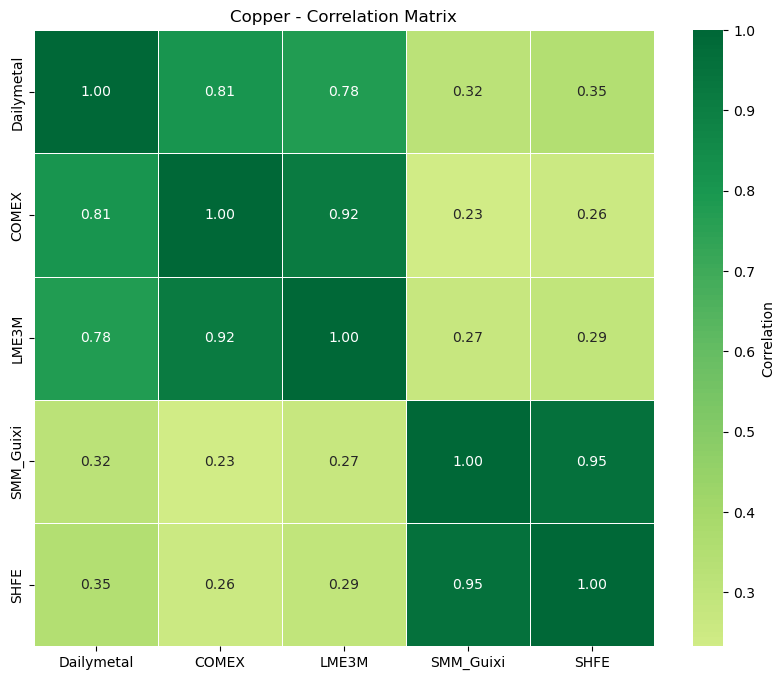

In [65]:
import seaborn as sns

# Calculate the correlation matrix using the returns
dfcu_merged['Dailymetal'] = dfcu_merged['Price_Dailymetal'].pct_change()
dfcu_merged['COMEX'] = dfcu_merged['Price_COMEX'].pct_change()
dfcu_merged['LME3M'] = dfcu_merged['Price_LME_3M'].pct_change()
dfcu_merged['SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].pct_change()
dfcu_merged['SHFE'] = dfcu_merged['Price_SHFE'].pct_change()

import matplotlib.pyplot as plt

# Drop NaN values
dfcu_merged = dfcu_merged.dropna(subset=['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE'])

# Calculate the correlation matrix
correlation_matrix_copper = dfcu_merged[['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE']].corr()

# Plot the correlation matrix with a gradient color scale
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper, annot=True,center=0, cmap='RdYlGn', cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper - Correlation Matrix")
plt.show()

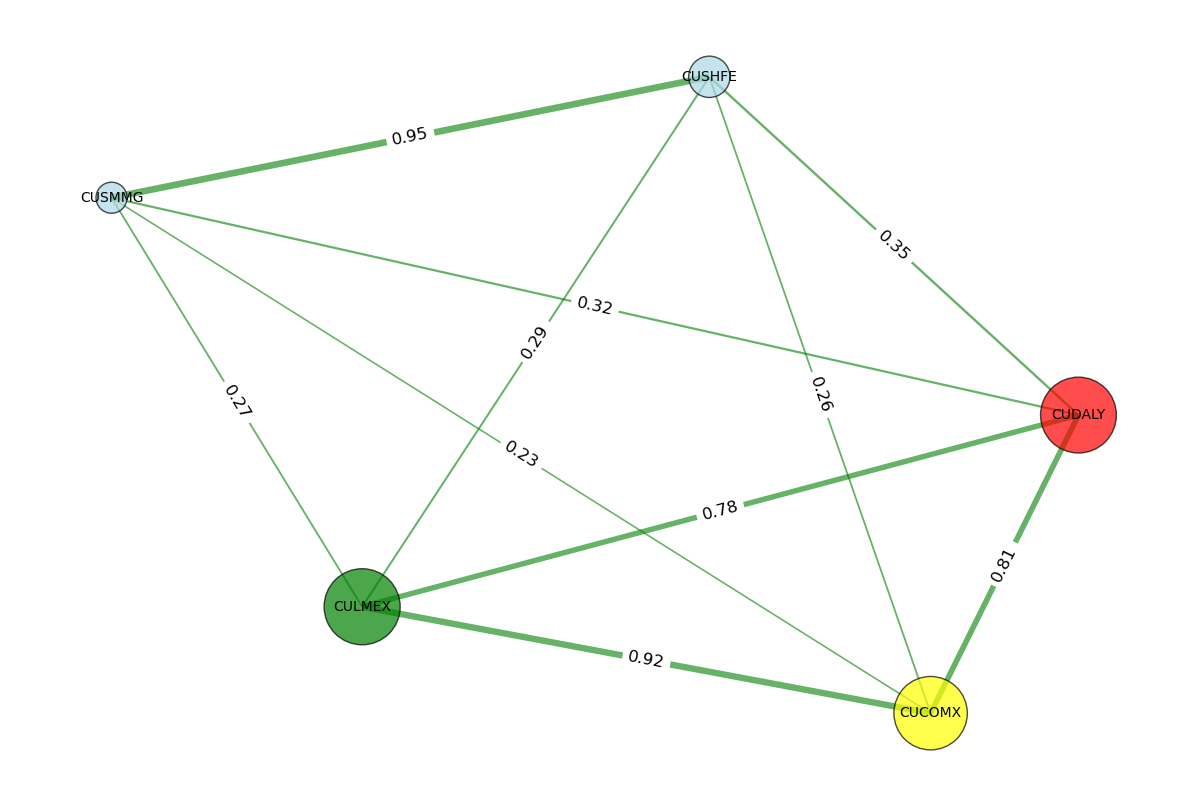

In [66]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix_copper.columns)):
    for j in range(i + 1, len(correlation_matrix_copper.columns)):
        corr_value = correlation_matrix_copper.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix_copper.columns[i], correlation_matrix_copper.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=42)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    "Dailymetal": "CUDALY",
    "COMEX": "CUCOMX",
    "LME3M": "CULMEX",
    "SMM_Guixi": "CUSMMG",
    "SHFE": "CUSHFE",
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=10)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# plt.title('Nickel - Correlation Network', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('img/copper_corr_net.png', dpi=300, bbox_inches='tight')
plt.show()

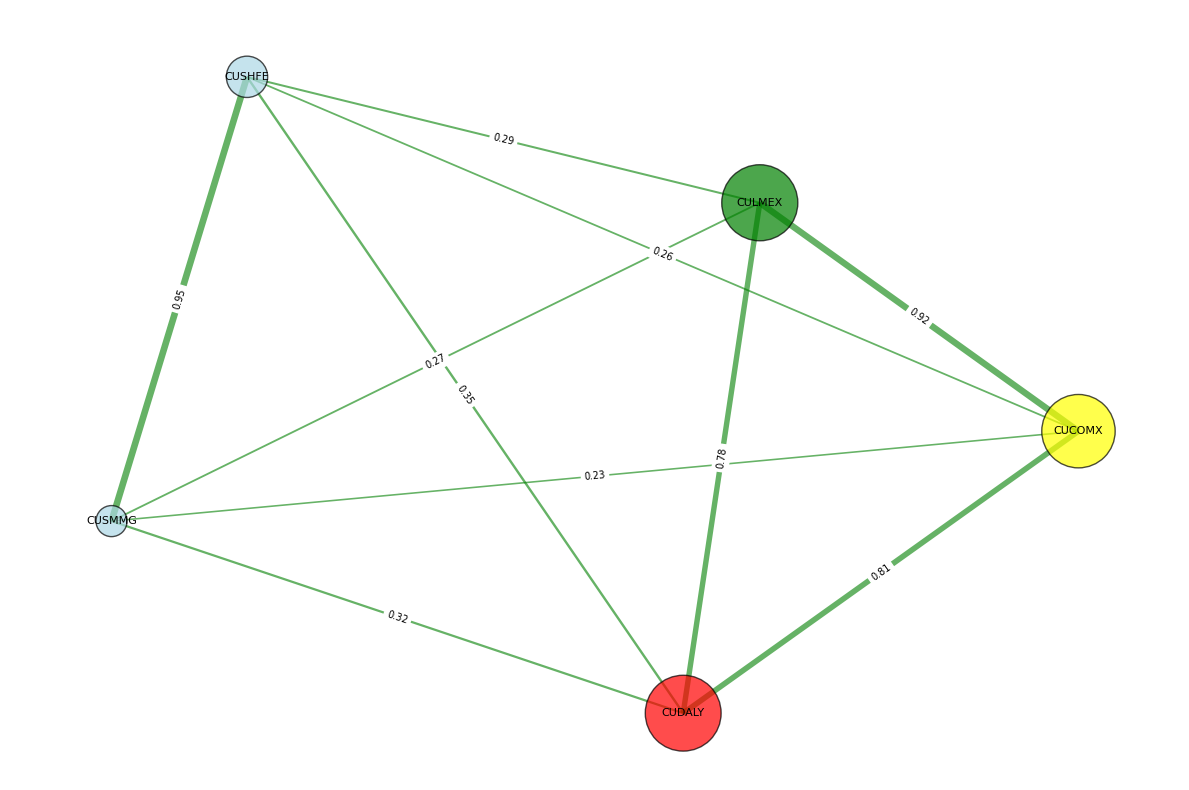


Node Centrality Values:
LME3M: 2.2548
Dailymetal: 2.2514
COMEX: 2.2150
SHFE: 1.8493
SMM_Guixi: 1.7756


In [67]:
# Create a network visualization of correlations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix_copper.columns)):
    for j in range(i + 1, len(correlation_matrix_copper.columns)):
        corr_value = correlation_matrix_copper.iloc[i, j]
        if abs(corr_value) > 0:  # Only include edges with correlation above threshold
            G.add_edge(correlation_matrix_copper.columns[i], correlation_matrix_copper.columns[j], weight=corr_value)

# Define positions for the nodes using spring layout
pos = nx.spring_layout(G, k=1, seed=44)

# Compute centrality (sum of absolute edge weights for each node)
centrality = {}
for node in G.nodes():
    total_weight = sum(abs(G[node][neighbor]['weight']) for neighbor in G.neighbors(node))
    centrality[node] = total_weight

# Normalize centrality for node sizes (scale between 500 and 3000)
min_centrality = min(centrality.values()) if centrality.values() else 1
max_centrality = max(centrality.values()) if centrality.values() else 1
centrality_range = max_centrality - min_centrality if max_centrality != min_centrality else 1

node_sizes = []
for node in G.nodes():
    normalized_centrality = (centrality[node] - min_centrality) / centrality_range
    size = 500 + normalized_centrality * 2500  # Scale between 500 and 3000
    node_sizes.append(size)

# Define node colors based on data source
def get_node_color(node_name):
    node_lower = node_name.lower()
    if 'dailymetal' in node_lower:
        return 'red'
    elif 'lme' in node_lower:
        return 'green'
    elif 'comex' in node_lower:
        return 'yellow'
    else:
        return 'lightblue'  # Default color for other nodes

node_colors = [get_node_color(node) for node in G.nodes()]

# Create figure
plt.figure(figsize=(12, 8))

# Draw nodes with different colors and sizes based on centrality
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7, edgecolors='black', linewidths=1)

# Draw edges with width based on absolute correlation value
edges = G.edges(data=True)
edge_colors = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)

# Create a mapping for shorter labels
label_mapping = {
    "Dailymetal": "CUDALY",
    "COMEX": "CUCOMX",
    "LME3M": "CULMEX",
    "SMM_Guixi": "CUSMMG",
    "SHFE": "CUSHFE",
}

# Draw labels with shorter names
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=8)

# Add correlation values as edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.axis('off')
plt.tight_layout()

# Save the plot
plt.savefig('img/copper_corr_net2.png', dpi=300, bbox_inches='tight')
plt.show()

# Print centrality values for reference
print("\nNode Centrality Values:")
for node in sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True):
    print(f"{node}: {centrality[node]:.4f}")

In [68]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_copper = [
    ('Price_Dailymetal', 'Price_COMEX'),
    ('Price_Dailymetal', 'Price_LME_3M'),
    ('Price_Dailymetal', 'Price_SMM_Guixi'),
    ('Price_Dailymetal', 'Price_SHFE'),
    ('Price_COMEX', 'Price_LME_3M'),
    ('Price_COMEX', 'Price_SMM_Guixi'),
    ('Price_COMEX', 'Price_SHFE'),
    ('Price_LME_3M', 'Price_SMM_Guixi'),
    ('Price_LME_3M', 'Price_SHFE'),
    ('Price_SMM_Guixi', 'Price_SHFE')
]
# Perform tests and collect results
results_copper = []
for series1, series2 in pairs_copper:
    score, p_value, _ = coint(dfcu_merged[series1], dfcu_merged[series2])
    results_copper.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Copper Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_copper:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Copper Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Dailymetal                        Price_COMEX                             -7.1830        0.0000         
Price_Dailymetal                        Price_LME_3M                            -1.0615        0.8905         
Price_Dailymetal                        Price_SMM_Guixi                         -2.4567        0.2985         
Price_Dailymetal                        Price_SHFE                              -2.3700        0.3392         
Price_COMEX                             Price_LME_3M                            -0.9802        0.9065         
Price_COMEX                             Price_SMM_Guixi                         -2.4809        0.2876         
Price_COMEX                             Price_SHFE                              -2.4009        0.3244         
Price_LME_3M                            Price_SMM_Guixi                      

In [69]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")

# Define ticker mapping
ticker_map = {
    "Price_Dailymetal": "CUDALY",
    "Price_COMEX": "CUCOMX",
    "Price_LME_3M": "CULMEX",
    "Price_SMM_Guixi": "CUSMMG",
    "Price_SHFE": "CUSHFE",
    "Price_ETF": "CUETFC"
}

for series1, series2, score, p_value in results_copper:
    # Get ticker symbols, fallback to original name if not in mapping
    ticker1 = ticker_map.get(series1, series1.replace("_", "\\_"))
    ticker2 = ticker_map.get(series2, series2.replace("_", "\\_"))
    p_value_str = f"\\textcolor{{green}}{{{p_value:.4f}}}" if p_value < 0.05 else f"{p_value:.4f}"
    print(f"{ticker1} & {ticker2} & {score:.4f} & {p_value_str} \\\\")

print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results - Copper}")
print("\\label{tab:cointegration_copper}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
CUDALY & CUCOMX & -7.1830 & \textcolor{green}{0.0000} \\
CUDALY & CULMEX & -1.0615 & 0.8905 \\
CUDALY & CUSMMG & -2.4567 & 0.2985 \\
CUDALY & CUSHFE & -2.3700 & 0.3392 \\
CUCOMX & CULMEX & -0.9802 & 0.9065 \\
CUCOMX & CUSMMG & -2.4809 & 0.2876 \\
CUCOMX & CUSHFE & -2.4009 & 0.3244 \\
CULMEX & CUSMMG & -2.0228 & 0.5167 \\
CULMEX & CUSHFE & -1.9369 & 0.5612 \\
CUSMMG & CUSHFE & -5.3045 & \textcolor{green}{0.0000} \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results - Copper}
\label{tab:cointegration_copper}
\end{table}


## Include the ETF

In [70]:
dfcu_merged = pd.merge(dfcu_merged, dfcu6[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_ETF'})
dfcu_merged.head()

,Date,Price_Dailymetal,Price_COMEX,Price_LME_3M,Price_SMM_Guixi,Price_SHFE,Dailymetal,COMEX,LME3M,SMM_Guixi,SHFE,Price_ETF
0,2024-03-06,3.8706,3.87,8577.0,68815.0,68940.0,0.006684,0.007812,0.010069,-0.001886,-0.001304,20.15
1,2024-03-07,3.9131,3.92,8640.5,69235.0,69300.0,0.010980,0.012920,0.007404,0.006103,0.005222,20.68
2,2024-03-08,3.8850,3.89,8579.5,69630.0,69710.0,-0.007181,-0.007653,-0.007060,0.005705,0.005916,20.57
3,2024-03-11,3.9240,3.92,8653.0,69335.0,69360.0,0.010039,0.007712,0.008567,-0.004237,-0.005021,20.82
4,2024-03-12,3.9207,3.93,8657.0,69500.0,69520.0,-0.000841,0.002551,0.000462,0.002380,0.002307,20.81


In [71]:
print(f"First observation date: {dfcu_merged['Date'].min()}, Last observation date: {dfcu_merged['Date'].max()}")

First observation date: 2024-03-06 00:00:00, Last observation date: 2025-05-12 00:00:00


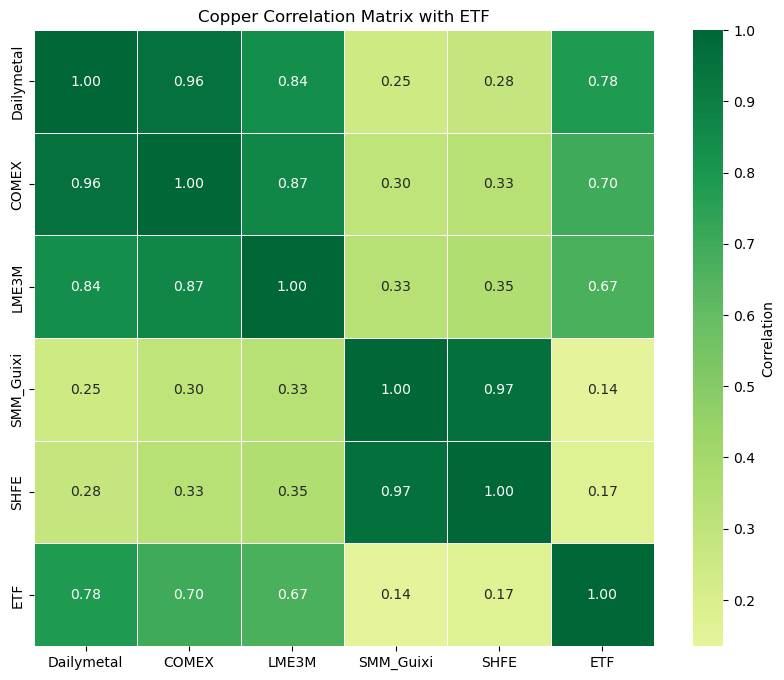

In [72]:
dfcu_merged['ETF'] = dfcu_merged['Price_ETF'].pct_change()
# Drop NaN values
dfcu_merged = dfcu_merged.dropna(subset=['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE', 'ETF'])
# Calculate the correlation matrix including the ETF
correlation_matrix_copper = dfcu_merged[['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE', 'ETF']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper Correlation Matrix with ETF")
plt.show()

In [73]:
dfcu_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_inner.csv', index=False)

# Combine

In [74]:
import json

# Load ticker mapping
with open('barb_experiments/ticker_mapping.json', 'r') as f:
    ticker_mapping = json.load(f)

# Per metal, merge the dataframes into a single dataframe using the 'Date' column with an outer join
df_merged_lithium = df1.merge(df2, on='Date', how='outer', suffixes=('_DailyMetal', '_SouthAmericaLOB'))
df_merged_lithium = df_merged_lithium.merge(df3.rename(columns={'Price': 'Price_COMEXLithiumHydroxide'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df4.rename(columns={'Price': 'Price_LithiumAmericasCorp'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df5.rename(columns={'Price': 'Price_EastAsiaLithiumCarbonate'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df6.rename(columns={'Price': 'Price_EastAsiaLithiumCarbonateBatteryGrade'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df7.rename(columns={'Price': 'Price_LithiumLME'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_lithium['Price_DailyMetal'] = df_merged_lithium['Price_DailyMetal'].astype(float)
df_merged_lithium['Price_SouthAmericaLOB'] = df_merged_lithium['Price_SouthAmericaLOB'].astype(float)
df_merged_lithium['Price_COMEXLithiumHydroxide'] = df_merged_lithium['Price_COMEXLithiumHydroxide'].astype(float)
df_merged_lithium['Price_LithiumAmericasCorp'] = df_merged_lithium['Price_LithiumAmericasCorp'].astype(float)
df_merged_lithium['Price_EastAsiaLithiumCarbonate'] = df_merged_lithium['Price_EastAsiaLithiumCarbonate'].astype(float)
df_merged_lithium['Price_EastAsiaLithiumCarbonateBatteryGrade'] = df_merged_lithium['Price_EastAsiaLithiumCarbonateBatteryGrade'].astype(float)
df_merged_lithium['Price_LithiumLME'] = df_merged_lithium['Price_LithiumLME'].astype(float)

# Apply ticker mapping for lithium
df_merged_lithium = df_merged_lithium.rename(columns=ticker_mapping['lithium'])

# Remove duplicates if any
df_merged_lithium = df_merged_lithium.drop_duplicates(subset=['Date'])

# Export the merged dataframe to a CSV file
df_merged_lithium.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_outer.csv', index=False)

# Nickel dataframes
df_merged_nickel = dfn1.merge(dfn2, on='Date', how='outer', suffixes=('_DailyMetal', '_LME'))
df_merged_nickel = df_merged_nickel.merge(dfn3.rename(columns={'Price': 'Price_ETF'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn4.rename(columns={'Price': 'Price_SHFE'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn5.rename(columns={'Price': 'Price_WUXI'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn6.rename(columns={'Price': 'Price_India'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_nickel['Price_DailyMetal'] = df_merged_nickel['Price_DailyMetal'].astype(float)
df_merged_nickel['Price_LME'] = df_merged_nickel['Price_LME'].astype(float)
df_merged_nickel['Price_ETF'] = df_merged_nickel['Price_ETF'].astype(float)
df_merged_nickel['Price_SHFE'] = df_merged_nickel['Price_SHFE'].astype(float)
df_merged_nickel['Price_WUXI'] = df_merged_nickel['Price_WUXI'].astype(float)
df_merged_nickel['Price_India'] = df_merged_nickel['Price_India'].astype(float)

# Apply ticker mapping for nickel
df_merged_nickel = df_merged_nickel.rename(columns=ticker_mapping['nickel'])

# Remove duplicates if any
df_merged_nickel = df_merged_nickel.drop_duplicates(subset=['Date'])

# Export the merged dataframe to a CSV file
df_merged_nickel.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_outer.csv', index=False)

# Cobalt dataframes
df_merged_cobalt = dfc1.merge(dfc2, on='Date', how='outer', suffixes=('_DailyMetal', '_LME'))
df_merged_cobalt = df_merged_cobalt.merge(dfc3.rename(columns={'Price': 'Price_LME_3M'}), on='Date', how='outer')
df_merged_cobalt = df_merged_cobalt.merge(dfc5.rename(columns={'Price': 'Price_LME_All_Location_Stock'}), on='Date', how='outer')
df_merged_cobalt = df_merged_cobalt.merge(dfc6.rename(columns={'Price': 'Price_WUXI'}), on='Date', how='outer')
df_merged_cobalt = df_merged_cobalt.merge(dfc7.rename(columns={'Price': 'Price_COMEX'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_cobalt['Price_DailyMetal'] = df_merged_cobalt['Price_DailyMetal'].astype(float)
df_merged_cobalt['Price_LME'] = df_merged_cobalt['Price_LME'].astype(float)
df_merged_cobalt['Price_LME_3M'] = df_merged_cobalt['Price_LME_3M'].astype(float)
df_merged_cobalt['Price_LME_All_Location_Stock'] = df_merged_cobalt['Price_LME_All_Location_Stock'].astype(float)
df_merged_cobalt['Price_WUXI'] = df_merged_cobalt['Price_WUXI'].astype(float)
df_merged_cobalt['Price_COMEX'] = df_merged_cobalt['Price_COMEX'].astype(float)

# Apply ticker mapping for cobalt
df_merged_cobalt = df_merged_cobalt.rename(columns=ticker_mapping['cobalt'])

# Remove duplicates if any
df_merged_cobalt = df_merged_cobalt.drop_duplicates(subset=['Date'])

# Export the merged dataframe to a CSV file
df_merged_cobalt.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_outer.csv', index=False)

# Copper dataframes
df_merged_copper = dfcu1.merge(dfcu2, on='Date', how='outer', suffixes=('_DailyMetal', '_COMEX'))
df_merged_copper = df_merged_copper.merge(dfcu3.rename(columns={'Price': 'Price_LME_3M'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu4.rename(columns={'Price': 'Price_SMM_Guixi'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu5.rename(columns={'Price': 'Price_SHFE'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu6.rename(columns={'Price': 'Price_ETF'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_copper['Price_DailyMetal'] = df_merged_copper['Price_DailyMetal'].astype(float)
df_merged_copper['Price_COMEX'] = df_merged_copper['Price_COMEX'].astype(float)
df_merged_copper['Price_LME_3M'] = df_merged_copper['Price_LME_3M'].astype(float)
df_merged_copper['Price_SMM_Guixi'] = df_merged_copper['Price_SMM_Guixi'].astype(float)
df_merged_copper['Price_SHFE'] = df_merged_copper['Price_SHFE'].astype(float)
df_merged_copper['Price_ETF'] = df_merged_copper['Price_ETF'].astype(float)

# Apply ticker mapping for copper
df_merged_copper = df_merged_copper.rename(columns=ticker_mapping['copper'])

# Remove duplicates if any
df_merged_copper = df_merged_copper.drop_duplicates(subset=['Date'])

# Export the merged dataframe to a CSV file
df_merged_copper.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_outer.csv', index=False)

In [75]:
df_merged_lithium.head()

,Date,LIDALY,LISAME,LICOMX,LILAMC,LIEALC,LIEABG,LILMEX
0,2016-12-31,NaN,10000.0,NaN,NaN,NaN,NaN,NaN
1,2017-01-31,NaN,10000.0,NaN,NaN,NaN,NaN,NaN
2,2017-02-28,NaN,10250.0,NaN,NaN,NaN,NaN,NaN
3,2017-03-31,NaN,10250.0,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,10500.0,NaN,NaN,NaN,NaN,NaN


In [76]:
# Now for all metals, interpolate the missing values in the merged dataframe. Use linear interpolation for the 'Price' columns.
df_merged_lithium_linear = df_merged_lithium.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_nickel_linear = df_merged_nickel.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_cobalt_linear = df_merged_cobalt.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_copper_linear = df_merged_copper.interpolate(method='linear', limit_direction='both', limit_area='inside')
# Save the interpolated dataframes to CSV files
df_merged_lithium_linear.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_interpolated.csv', index=False)
df_merged_nickel_linear.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_interpolated.csv', index=False)
df_merged_cobalt_linear.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_interpolated.csv', index=False)
df_merged_copper_linear.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_interpolated.csv', index=False)

# Date Ranges

In [77]:
# List date ranges for each time series
def print_date_range(df, name):
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    print(f"{name}: First observation date: {min_date}, Last observation date: {max_date}")

print_date_range(df1, "Lithium DailyMetal")
print_date_range(df2, "Lithium SouthAmericaLOB")
print_date_range(df3, "Lithium COMEX Lithium Hydroxide")
print_date_range(df4, "Lithium Lithium Americas Corp")
print_date_range(df5, "Lithium East Asia Lithium Carbonate")
print_date_range(df6, "Lithium East Asia Lithium Carbonate Battery Grade")
print_date_range(df7, "Lithium LME Lithium")

print_date_range(dfn1, "Nickel DailyMetal")
print_date_range(dfn2, "Nickel LME")
print_date_range(dfn3, "Nickel ETF")
print_date_range(dfn4, "Nickel SHFE")
print_date_range(dfn5, "Nickel WUXI")
print_date_range(dfn6, "Nickel India")

print_date_range(dfc1, "Cobalt DailyMetal")
print_date_range(dfc2, "Cobalt LME")
print_date_range(dfc3, "Cobalt LME 3M")
print_date_range(dfc5, "Cobalt LME All Location Stock")
print_date_range(dfc6, "Cobalt WUXI")
print_date_range(dfc7, "Cobalt COMEX")

print_date_range(dfcu1, "Copper DailyMetal")
print_date_range(dfcu2, "Copper COMEX")
print_date_range(dfcu3, "Copper LME 3M")
print_date_range(dfcu4, "Copper SMM Guixi")
print_date_range(dfcu5, "Copper SHFE")
print_date_range(dfcu6, "Copper ETF")

Lithium DailyMetal: First observation date: 2017-05-10 00:00:00, Last observation date: 2025-10-31 00:00:00
Lithium SouthAmericaLOB: First observation date: 2016-12-31 00:00:00, Last observation date: 2024-12-11 00:00:00
Lithium COMEX Lithium Hydroxide: First observation date: 2021-05-03 00:00:00, Last observation date: 2025-10-31 00:00:00
Lithium Lithium Americas Corp: First observation date: 2023-10-02 00:00:00, Last observation date: 2025-10-31 00:00:00
Lithium East Asia Lithium Carbonate: First observation date: 2023-05-02 00:00:00, Last observation date: 2025-03-28 00:00:00
Lithium East Asia Lithium Carbonate Battery Grade: First observation date: 2023-04-03 00:00:00, Last observation date: 2025-03-28 00:00:00
Lithium LME Lithium: First observation date: 2021-07-19 00:00:00, Last observation date: 2025-03-28 00:00:00
Nickel DailyMetal: First observation date: 2017-01-02 00:00:00, Last observation date: 2025-10-31 00:00:00
Nickel LME: First observation date: 2016-12-30 00:00:00, La

## Other interpolation methods

In [78]:
df_merged_cobalt.head()

,Date,CODALY,COLMEX,COLME3,COLMEA,COWUXI,COCOMX
0,2016-12-30,NaN,32734.0,NaN,NaN,NaN,NaN
1,2017-01-02,14.855,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,14.742,32735.0,32750.0,691.0,83.6,NaN
3,2017-01-04,14.742,32736.0,32750.0,676.0,84.0,NaN
4,2017-01-05,14.742,32739.5,32750.0,676.0,84.3,NaN


In [79]:
from scipy.interpolate import CubicSpline

def cubic_spline_interpolate(df):
    """Apply cubic spline interpolation to all price columns in the dataframe."""
    df_interpolated = df.copy()
    
    # Convert Date to datetime if not already
    df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])
    
    # Sort by date
    df_interpolated = df_interpolated.sort_values('Date').reset_index(drop=True)
    
    # Get all price columns (all columns except Date)
    price_columns = [col for col in df_interpolated.columns if col != 'Date']
    
    # Convert dates to numeric for interpolation (days since first date)
    date_numeric = (df_interpolated['Date'] - df_interpolated['Date'].min()).dt.days.values
    
    for col in price_columns:
        # Get non-null values
        mask = df_interpolated[col].notna()
        
        if mask.sum() > 3:  # Need at least 4 points for cubic spline
            x_known = date_numeric[mask]
            y_known = df_interpolated.loc[mask, col].values
            
            # Create cubic spline
            cs = CubicSpline(x_known, y_known)
            
            # Interpolate all values within the range
            mask_to_fill = df_interpolated[col].isna() & (date_numeric >= x_known.min()) & (date_numeric <= x_known.max())
            df_interpolated.loc[mask_to_fill, col] = cs(date_numeric[mask_to_fill])
    
    return df_interpolated

In [80]:
df_merged_lithium_cubic = cubic_spline_interpolate(df_merged_lithium)
df_merged_nickel_cubic = cubic_spline_interpolate(df_merged_nickel)
df_merged_cobalt_cubic = cubic_spline_interpolate(df_merged_cobalt)
df_merged_copper_cubic = cubic_spline_interpolate(df_merged_copper)

# Save the cubic spline interpolated dataframes to CSV files
df_merged_lithium_cubic.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_cubic_spline.csv', index=False)
df_merged_nickel_cubic.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_cubic_spline.csv', index=False)
df_merged_cobalt_cubic.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_cubic_spline.csv', index=False)
df_merged_copper_cubic.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_cubic_spline.csv', index=False)

In [81]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

def kalman_filter_interpolate(df):
    """Apply Kalman filtering interpolation to all price columns in the dataframe."""
    df_interpolated = df.copy()
    
    # Convert Date to datetime if not already
    df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])
    
    # Sort by date
    df_interpolated = df_interpolated.sort_values('Date').reset_index(drop=True)
    
    # Get all price columns (all columns except Date)
    price_columns = [col for col in df_interpolated.columns if col != 'Date']
    
    for col in price_columns:
        # Get the column data
        data = df_interpolated[col].values.reshape(-1, 1)
        
        # Check if there are enough non-null values
        if np.sum(~np.isnan(data)) > 1:
            # Create a mask for observations (True for non-NaN, False for NaN)
            mask = ~np.isnan(data[:, 0])
            
            # Get non-null values for EM training
            data_clean = data[mask]
            
            # Initialize Kalman Filter
            kf = KalmanFilter(
                transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=np.nanmean(data),
                initial_state_covariance=1,
                observation_covariance=1,
                transition_covariance=0.01
            )
            
            # Use EM algorithm to estimate parameters on clean data only
            kf = kf.em(data_clean, n_iter=5)
            
            # Apply smoothing to fill missing values using the learned parameters
            # Pass the full data with NaN mask
            (smoothed_state_means, smoothed_state_covariances) = kf.smooth(data)
            
            # Fill missing values with smoothed estimates
            mask_missing = np.isnan(data[:, 0])
            df_interpolated.loc[mask_missing, col] = smoothed_state_means[mask_missing, 0]
    
    return df_interpolated

In [82]:
# Apply cubic spline interpolation to lithium
df_merged_lithium_kalman = kalman_filter_interpolate(df_merged_lithium)
# Apply cubic spline interpolation to nickel
df_merged_nickel_kalman = kalman_filter_interpolate(df_merged_nickel)
# Apply cubic spline interpolation to cobalt
df_merged_cobalt_kalman = kalman_filter_interpolate(df_merged_cobalt)
# Apply cubic spline interpolation to copper
df_merged_copper_kalman = kalman_filter_interpolate(df_merged_copper)

# Save the Kalman filter interpolated dataframes to CSV files
df_merged_lithium_kalman.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_kalman.csv', index=False)
df_merged_nickel_kalman.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_kalman.csv', index=False)
df_merged_cobalt_kalman.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_kalman.csv', index=False)
df_merged_copper_kalman.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_kalman.csv', index=False)

### Correlation graphs cubic spline

#### Lithium

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/3188352355.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_lithium_cubic[col] = df_merged_lithium_cubic[col].pct_change()


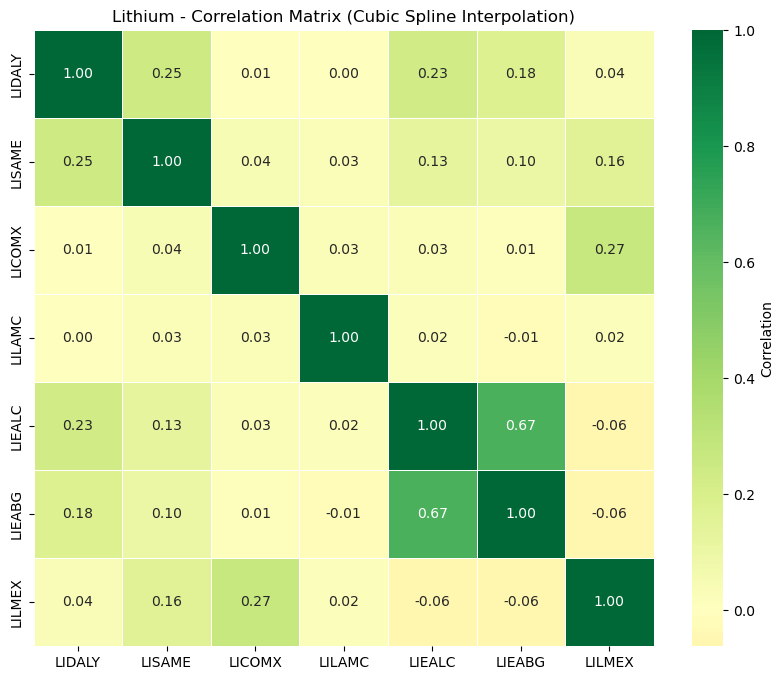

In [83]:
df_merged_lithium_cubic = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_cubic_spline.csv')

# Lithium
price_cols = [col for col in df_merged_lithium_cubic.columns if col != 'Date']
for col in price_cols:
    df_merged_lithium_cubic[col] = df_merged_lithium_cubic[col].pct_change()

df_merged_lithium_cubic = df_merged_lithium_cubic.dropna(subset=price_cols)

correlation_matrix_lithium_cubic = df_merged_lithium_cubic[price_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_lithium_cubic, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Lithium - Correlation Matrix (Cubic Spline Interpolation)")
plt.show()  

#### Nickel

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/1794761792.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_nickel_cubic[col] = df_merged_nickel_cubic[col].pct_change()


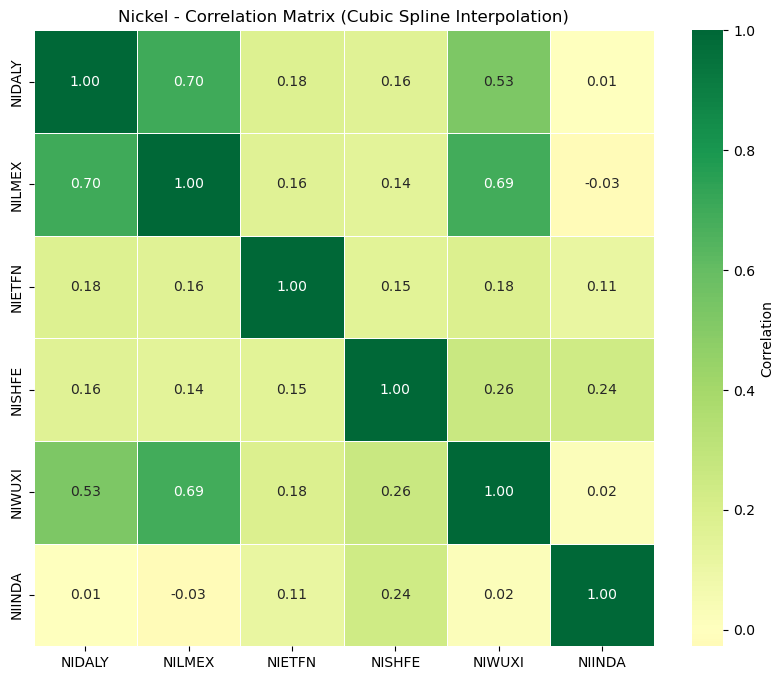

In [84]:
df_merged_nickel_cubic = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_cubic_spline.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_nickel_cubic.columns if col != 'Date']

# Compute returns for all price columns
for col in price_cols:
    df_merged_nickel_cubic[col] = df_merged_nickel_cubic[col].pct_change()

# Drop NaN values for all price columns
df_merged_nickel_cubic = df_merged_nickel_cubic.dropna(subset=price_cols)

# Calculate the correlation matrix using the returns
correlation_matrix_nickel_cubic = df_merged_nickel_cubic[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_nickel_cubic, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Nickel - Correlation Matrix (Cubic Spline Interpolation)")
plt.show()

#### Cobalt

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/991636234.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_cobalt_cubic[col] = df_merged_cobalt_cubic[col].pct_change()


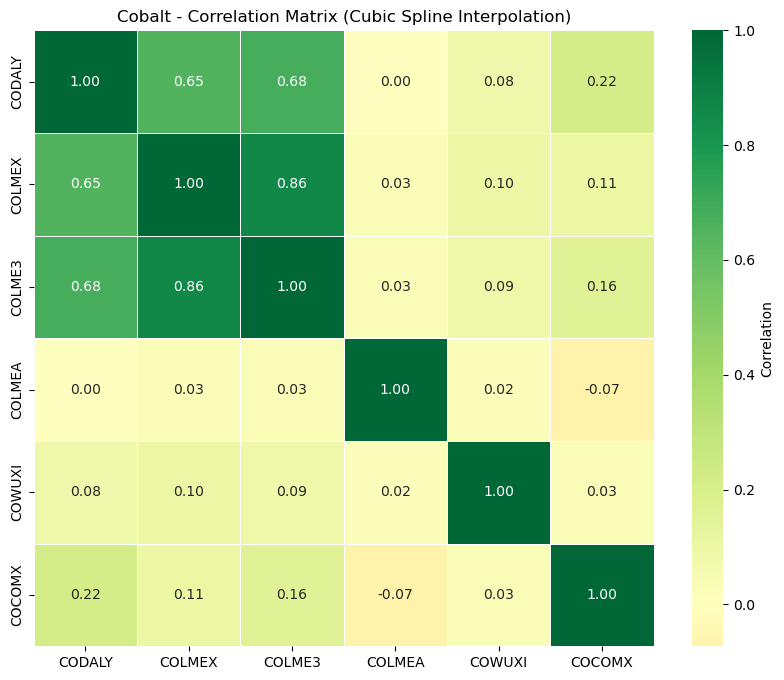

In [85]:
df_merged_cobalt_cubic = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_cubic_spline.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_cobalt_cubic.columns if col != 'Date']
# Compute returns for all price columns
for col in price_cols:
    df_merged_cobalt_cubic[col] = df_merged_cobalt_cubic[col].pct_change()
# Drop NaN values for all price columns
df_merged_cobalt_cubic = df_merged_cobalt_cubic.dropna(subset=price_cols)
# Calculate the correlation matrix using the returns
correlation_matrix_cobalt_cubic = df_merged_cobalt_cubic[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cobalt_cubic, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Cobalt - Correlation Matrix (Cubic Spline Interpolation)")
plt.show()

#### Copper

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/1731159665.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_copper_cubic[col] = df_merged_copper_cubic[col].pct_change()


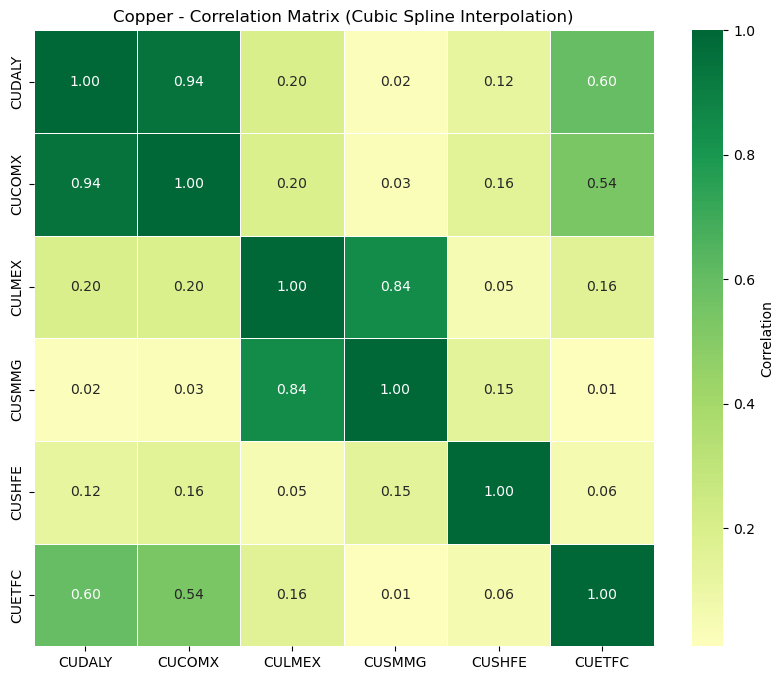

In [86]:
df_merged_copper_cubic = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_cubic_spline.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_copper_cubic.columns if col != 'Date']
# Compute returns for all price columns
for col in price_cols:
    df_merged_copper_cubic[col] = df_merged_copper_cubic[col].pct_change()
# Drop NaN values for all price columns
df_merged_copper_cubic = df_merged_copper_cubic.dropna(subset=price_cols)
# Calculate the correlation matrix using the returns
correlation_matrix_copper_cubic = df_merged_copper_cubic[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper_cubic, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper - Correlation Matrix (Cubic Spline Interpolation)")
plt.show()

### Correlation graphs Kalman

#### Lithium

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/3153145996.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_lithium_kalman[col] = df_merged_lithium_kalman[col].pct_change()


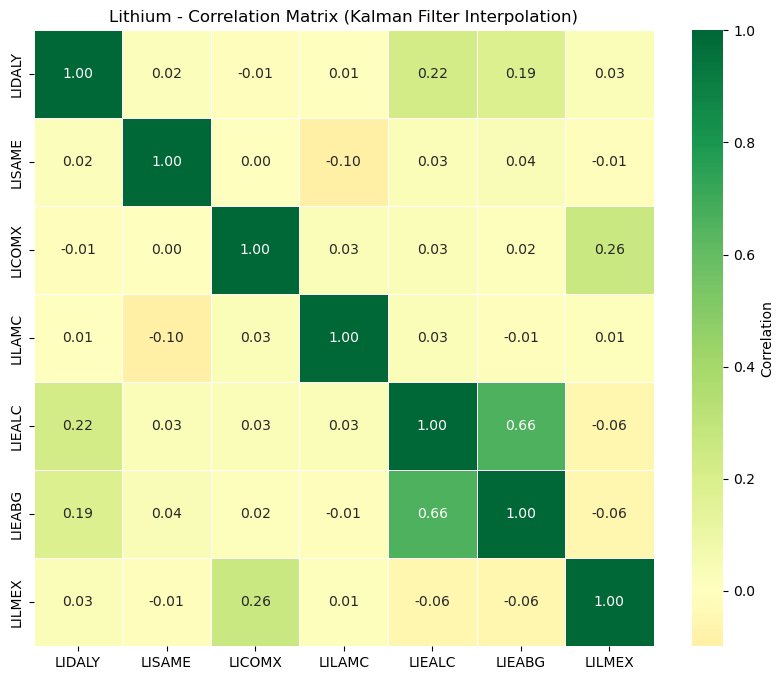

In [87]:
df_merged_lithium_kalman = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_kalman.csv')

price_cols = [col for col in df_merged_lithium_kalman.columns if col != 'Date']
for col in price_cols:
    df_merged_lithium_kalman[col] = df_merged_lithium_kalman[col].pct_change()

df_merged_lithium_kalman = df_merged_lithium_kalman.dropna(subset=price_cols)

correlation_matrix_lithium_kalman = df_merged_lithium_kalman[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_lithium_kalman, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)

plt.title("Lithium - Correlation Matrix (Kalman Filter Interpolation)")
plt.show()



#### Nickel

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/4031484879.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_nickel_kalman[col] = df_merged_nickel_kalman[col].pct_change()


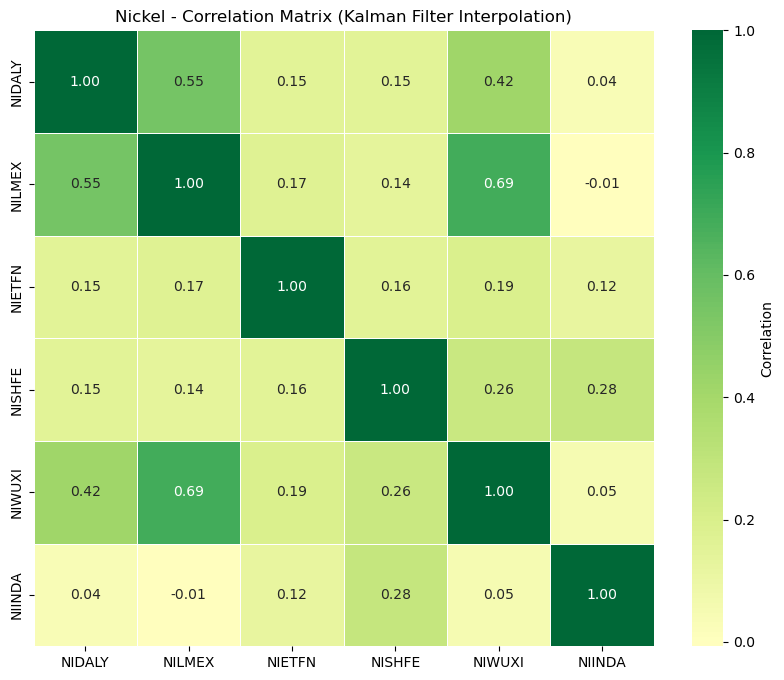

In [88]:
df_merged_nickel_kalman = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_kalman.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_nickel_kalman.columns if col != 'Date']
# Compute returns for all price columns
for col in price_cols:
    df_merged_nickel_kalman[col] = df_merged_nickel_kalman[col].pct_change()
# Drop NaN values for all price columns
df_merged_nickel_kalman = df_merged_nickel_kalman.dropna(subset=price_cols)
# Calculate the correlation matrix using the returns
correlation_matrix_nickel_kalman = df_merged_nickel_kalman[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_nickel_kalman, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Nickel - Correlation Matrix (Kalman Filter Interpolation)")
plt.show()

#### Cobalt

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/4079529846.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_cobalt_kalman[col] = df_merged_cobalt_kalman[col].pct_change()


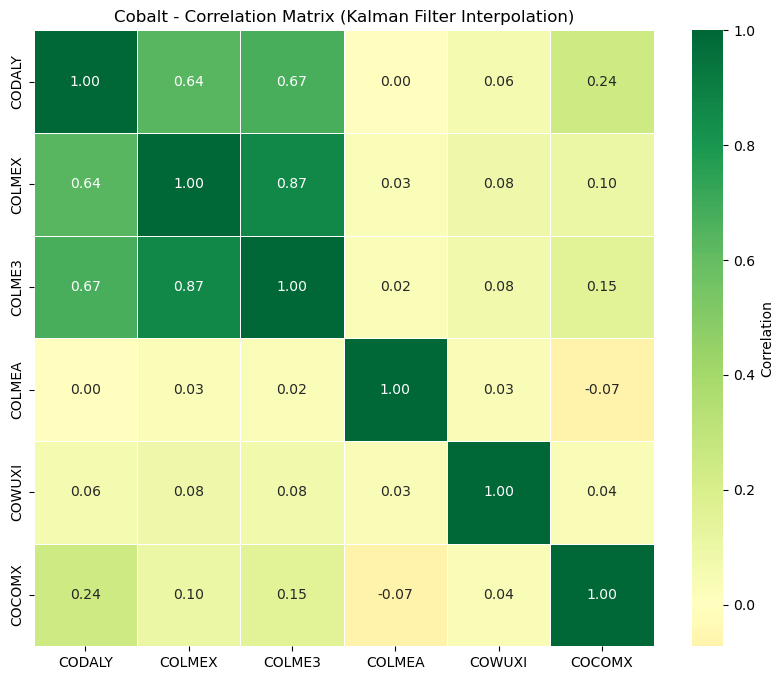

In [89]:
df_merged_cobalt_kalman = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_kalman.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_cobalt_kalman.columns if col != 'Date']
# Compute returns for all price columns
for col in price_cols:
    df_merged_cobalt_kalman[col] = df_merged_cobalt_kalman[col].pct_change()

# Drop NaN values for all price columns
df_merged_cobalt_kalman = df_merged_cobalt_kalman.dropna(subset=price_cols)

# Calculate the correlation matrix using the returns
correlation_matrix_cobalt_kalman = df_merged_cobalt_kalman[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cobalt_kalman, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Cobalt - Correlation Matrix (Kalman Filter Interpolation)")
plt.show()

#### Copper

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_78001/403385409.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged_copper_kalman[col] = df_merged_copper_kalman[col].pct_change()


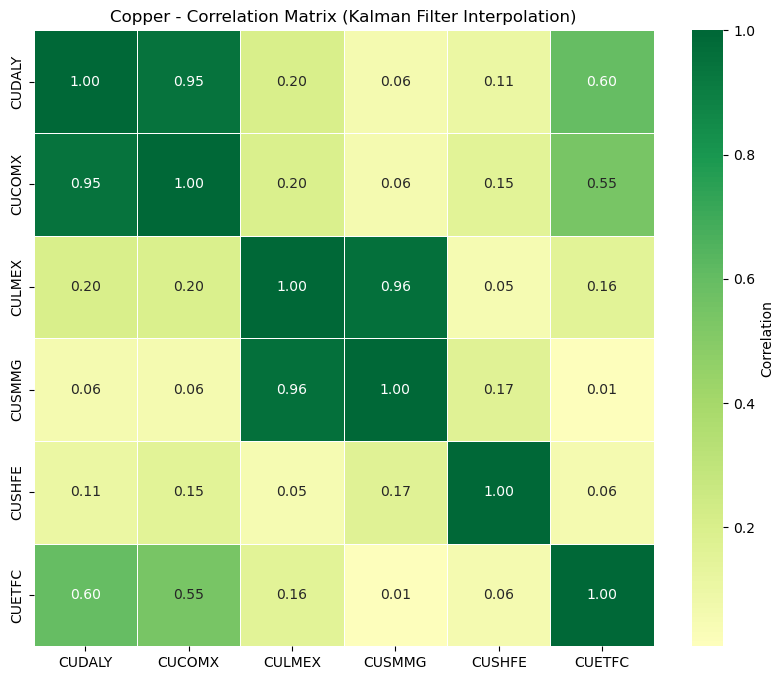

In [90]:
df_merged_copper_kalman = pd.read_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_kalman.csv')

# Detect price columns automatically (exclude 'Date')
price_cols = [col for col in df_merged_copper_kalman.columns if col != 'Date']
# Compute returns for all price columns
for col in price_cols:
    df_merged_copper_kalman[col] = df_merged_copper_kalman[col].pct_change()

# Drop NaN values for all price columns
df_merged_copper_kalman = df_merged_copper_kalman.dropna(subset=price_cols)

# Calculate the correlation matrix using the returns
correlation_matrix_copper_kalman = df_merged_copper_kalman[price_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper_kalman, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper - Correlation Matrix (Kalman Filter Interpolation)")
plt.show()